In [1]:
! pip install pandas
! pip install numpy
! pip install seaborn
! pip install matplotlib
! pip install keras
! pip install scikit-learn
! pip install tensorflow




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

In [5]:
data = pd.read_csv("../dataset/merged_file.csv")
data.head()

YEAR  MO  DY  HR  QV2M   RH2M  PRECTOTCORR     PS  WS50M   WD50M
0  2014   1  30   2  5.49  77.56          0.0  98.82   1.48  234.04
1  2014   1  30   3  5.49  77.38          0.0  98.87   1.16  232.13
2  2014   1  30   4  5.49  76.94          0.0  98.92   0.60  236.73
3  2014   1  30   5  5.37  75.94          0.0  98.97   0.17   76.61
4  2014   1  30   6  5.37  80.50          0.0  99.04   1.13   87.24

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87624 entries, 0 to 87623
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         87624 non-null  int64  
 1   MO           87624 non-null  int64  
 2   DY           87624 non-null  int64  
 3   HR           87624 non-null  int64  
 4   QV2M         87624 non-null  float64
 5   RH2M         87624 non-null  float64
 6   PRECTOTCORR  87624 non-null  float64
 7   PS           87624 non-null  float64
 8   WS50M        87624 non-null  float64
 9   WD50M        87624 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 6.7 MB


In [7]:
data.describe()

YEAR            MO            DY            HR          QV2M  \
count  87624.000000  87624.000000  87624.000000  87624.000000  87624.000000   
mean    2018.577878      6.525062     15.724162     11.500000      7.539688   
std        2.883656      3.447813      8.797801      6.922226      2.484511   
min     2014.000000      1.000000      1.000000      0.000000      1.650000   
25%     2016.000000      4.000000      8.000000      5.750000      5.800000   
50%     2019.000000      7.000000     16.000000     11.500000      7.570000   
75%     2021.000000     10.000000     23.000000     17.250000      9.220000   
max     2024.000000     12.000000     31.000000     23.000000     17.090000   

               RH2M   PRECTOTCORR            PS         WS50M        WD50M  
count  87624.000000  87624.000000  87624.000000  87624.000000  87624.00000  
mean      63.238715      0.071239     98.392801      4.885299    154.21860  
std       24.618245      0.319656      0.543349      2.450638    118.46267  
min        6.250000      0.000000     95.890000      0.020000      0.00000  
25%       43.810000      0.000000     98.000000      3.090000     37.88750  
50%       65.120000      0.000000     98.350000      4.570000    150.90500  
75%       84.940000      0.000000     98.750000      6.370000    260.78250  
max      100.000000     11.840000    100.430000     19.080000    359.96000

In [8]:
data.isnull().sum()

YEAR           0
MO             0
DY             0
HR             0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS50M          0
WD50M          0
dtype: int64

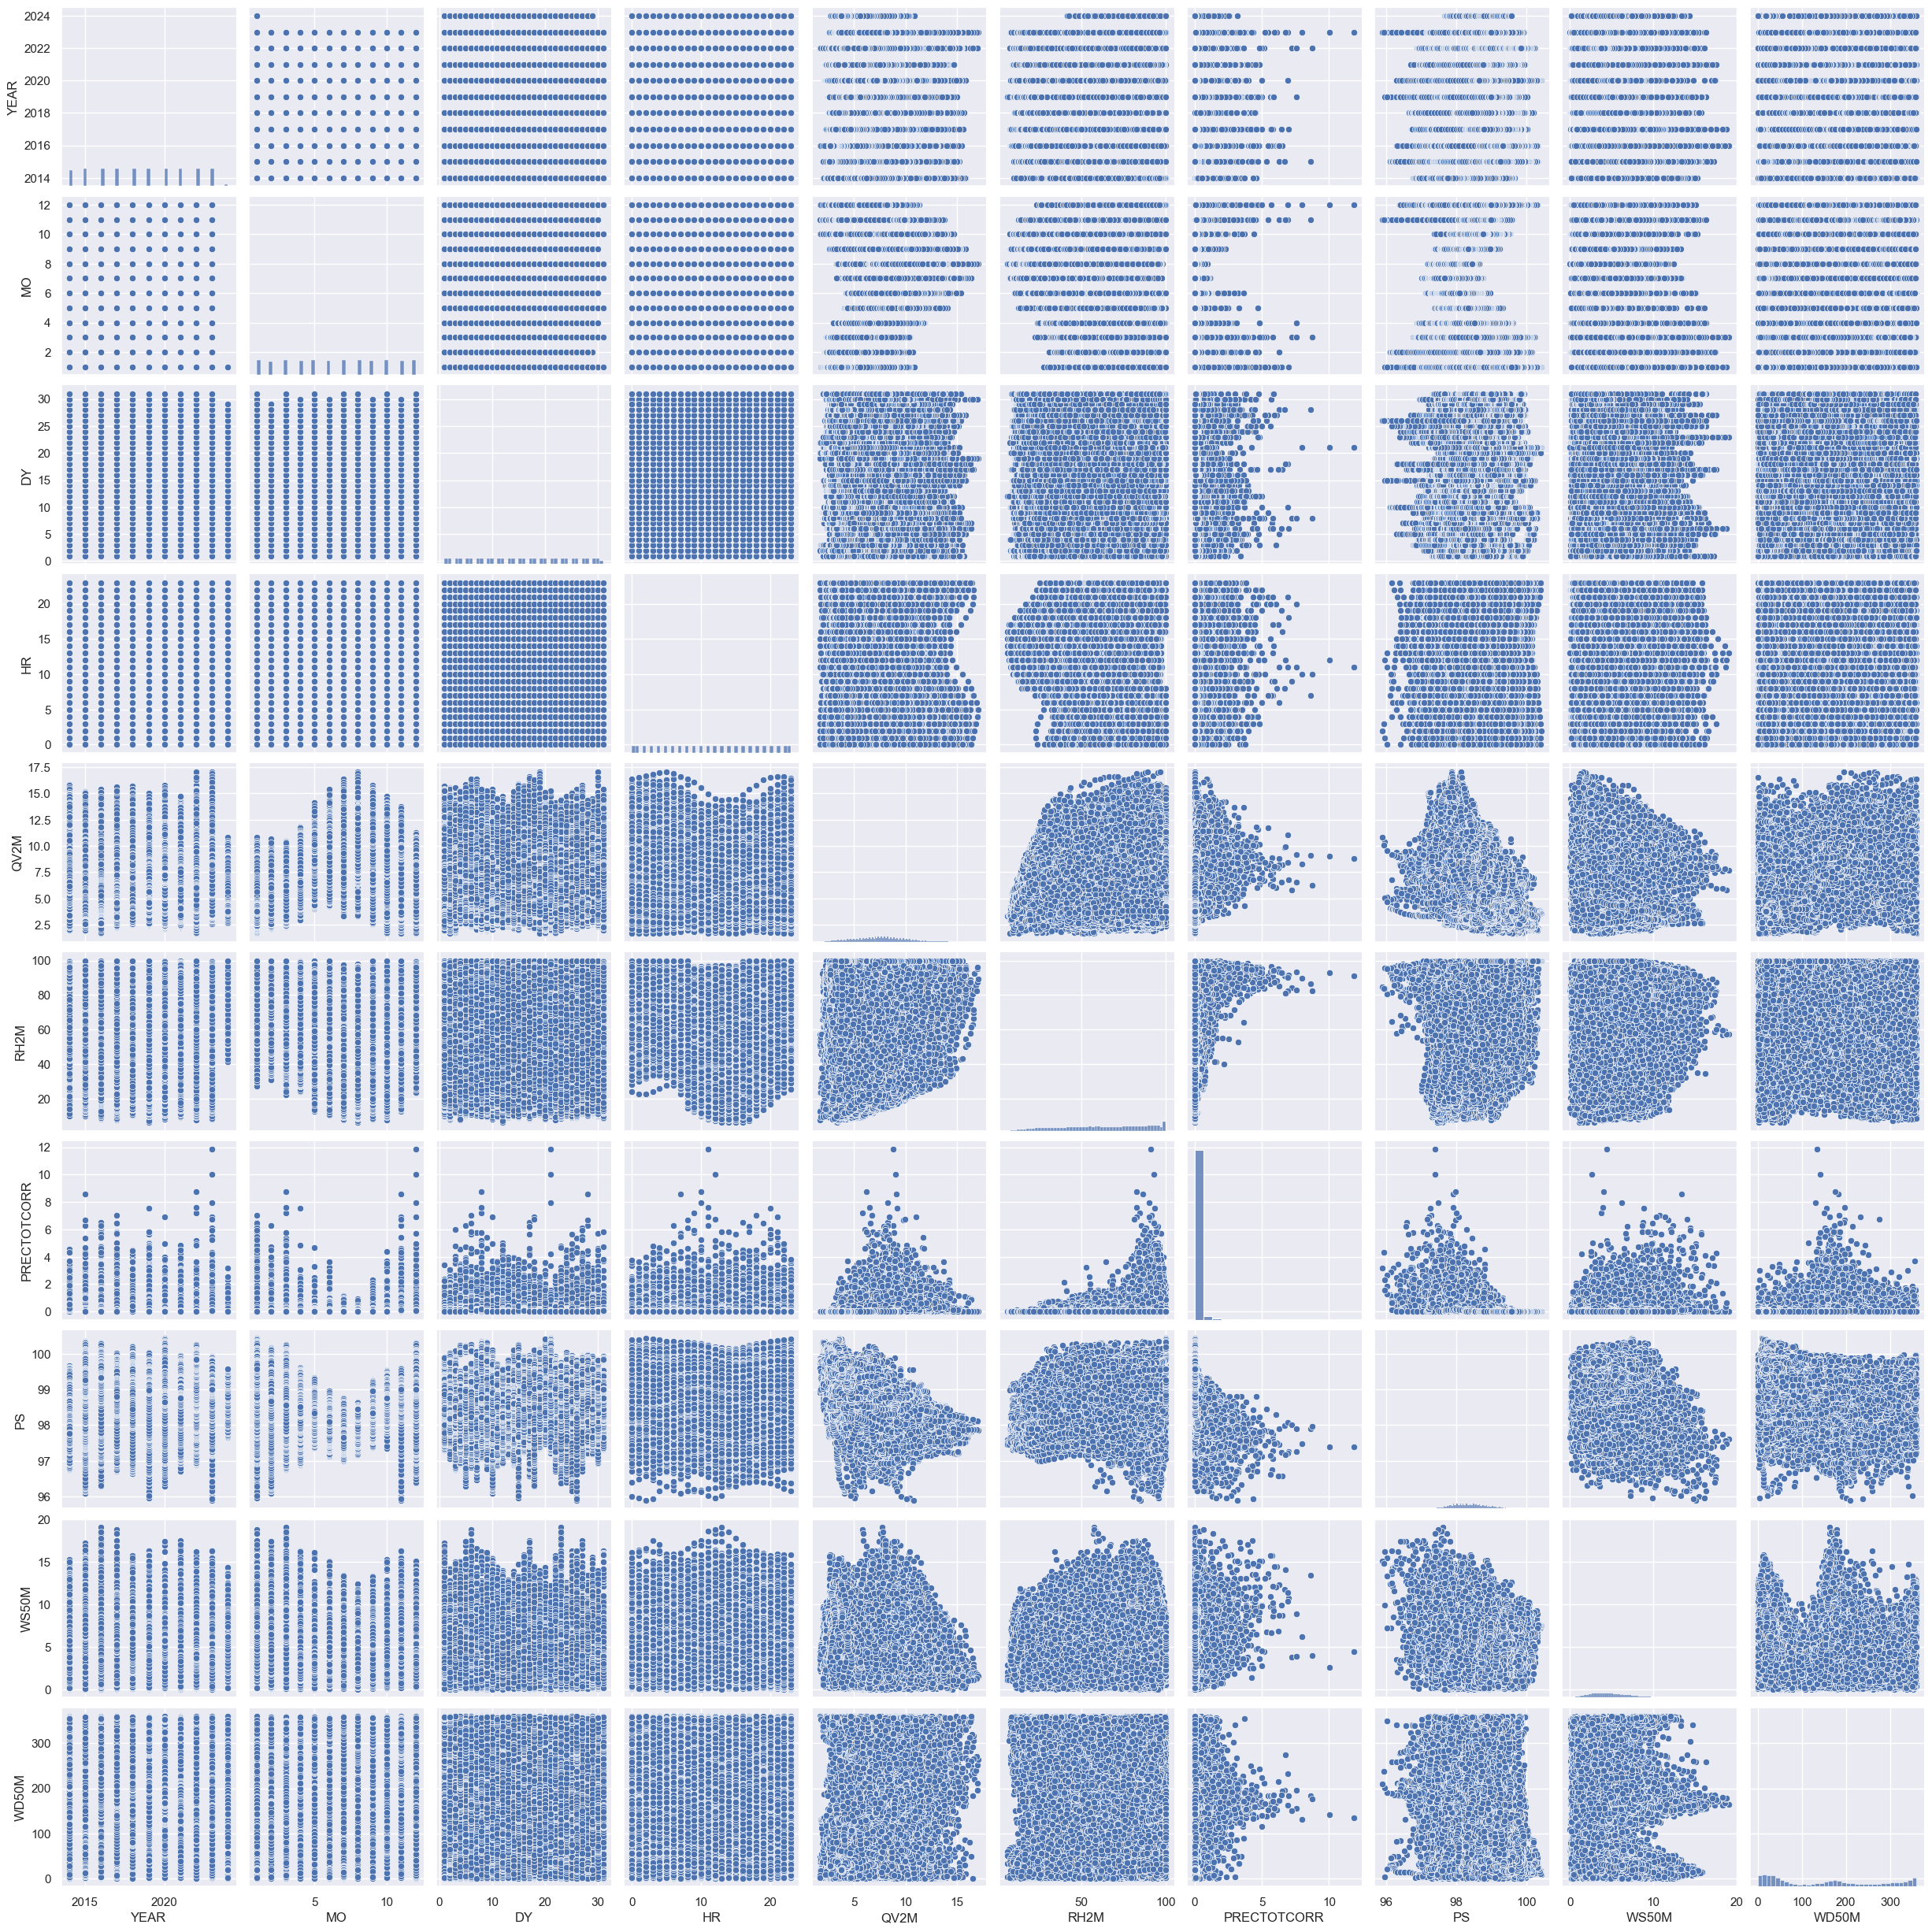

In [9]:
# Pair Plot correlation between all attributes
sns.pairplot(data)

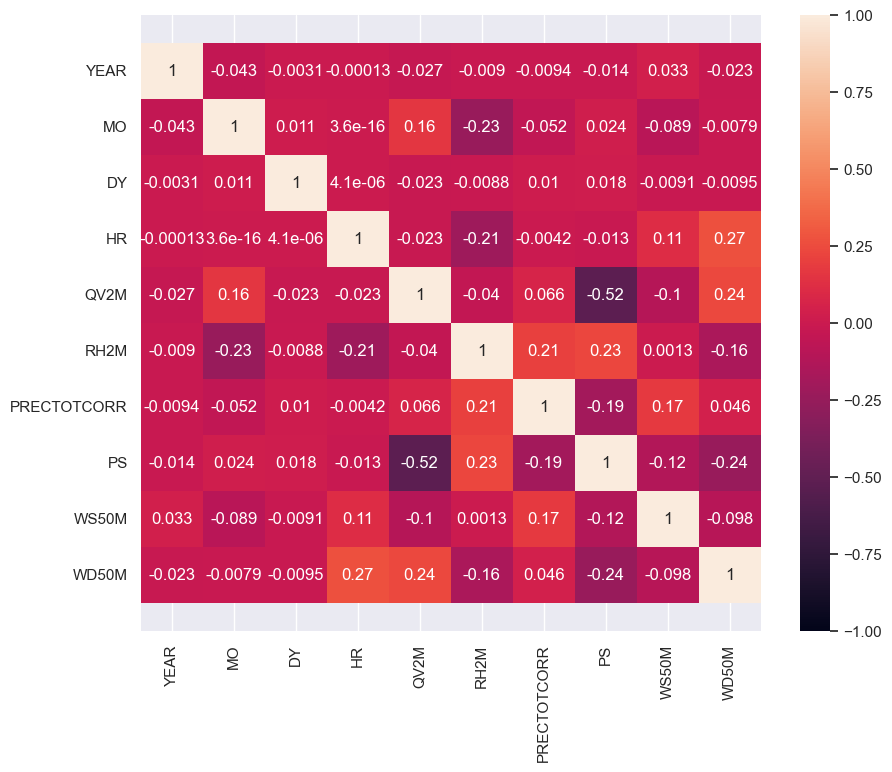

YEAR            MO        DY            HR      QV2M  \
YEAR         1.000000 -4.330592e-02 -0.003075 -1.257811e-04 -0.026887   
MO          -0.043306  1.000000e+00  0.011470  3.635043e-16  0.163938   
DY          -0.003075  1.146955e-02  1.000000  4.122727e-06 -0.022873   
HR          -0.000126  3.635043e-16  0.000004  1.000000e+00 -0.022964   
QV2M        -0.026887  1.639376e-01 -0.022873 -2.296364e-02  1.000000   
RH2M        -0.008957 -2.344997e-01 -0.008756 -2.133182e-01 -0.039821   
PRECTOTCORR -0.009422 -5.184452e-02  0.010073 -4.204369e-03  0.065546   
PS          -0.014470  2.417148e-02  0.017820 -1.339833e-02 -0.522517   
WS50M        0.032791 -8.877794e-02 -0.009052  1.128868e-01 -0.102919   
WD50M       -0.023024 -7.874199e-03 -0.009463  2.658987e-01  0.235672   

                 RH2M  PRECTOTCORR        PS     WS50M     WD50M  
YEAR        -0.008957    -0.009422 -0.014470  0.032791 -0.023024  
MO          -0.234500    -0.051845  0.024171 -0.088778 -0.007874  
DY          -0.008756     0.010073  0.017820 -0.009052 -0.009463  
HR          -0.213318    -0.004204 -0.013398  0.112887  0.265899  
QV2M        -0.039821     0.065546 -0.522517 -0.102919  0.235672  
RH2M         1.000000     0.210458  0.227394  0.001300 -0.155593  
PRECTOTCORR  0.210458     1.000000 -0.190206  0.174515  0.045762  
PS           0.227394    -0.190206  1.000000 -0.118368 -0.240562  
WS50M        0.001300     0.174515 -0.118368  1.000000 -0.098327  
WD50M       -0.155593     0.045762 -0.240562 -0.098327  1.000000

In [10]:
corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [11]:
# Importing a visualization library
! pip install windrose

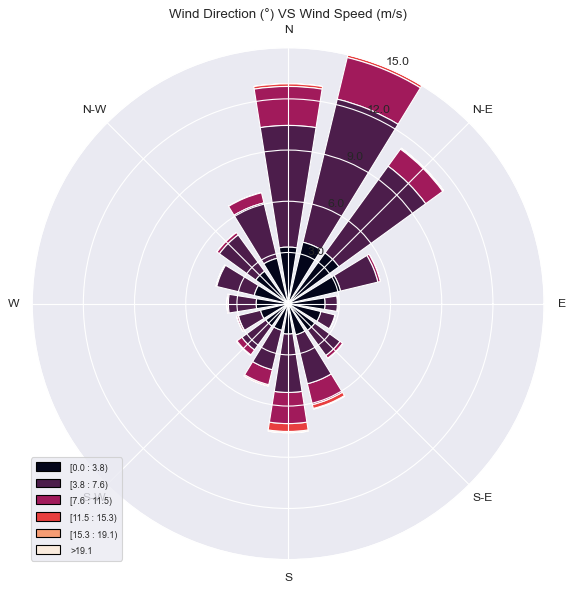

In [13]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['WD50M'], data['WS50M'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

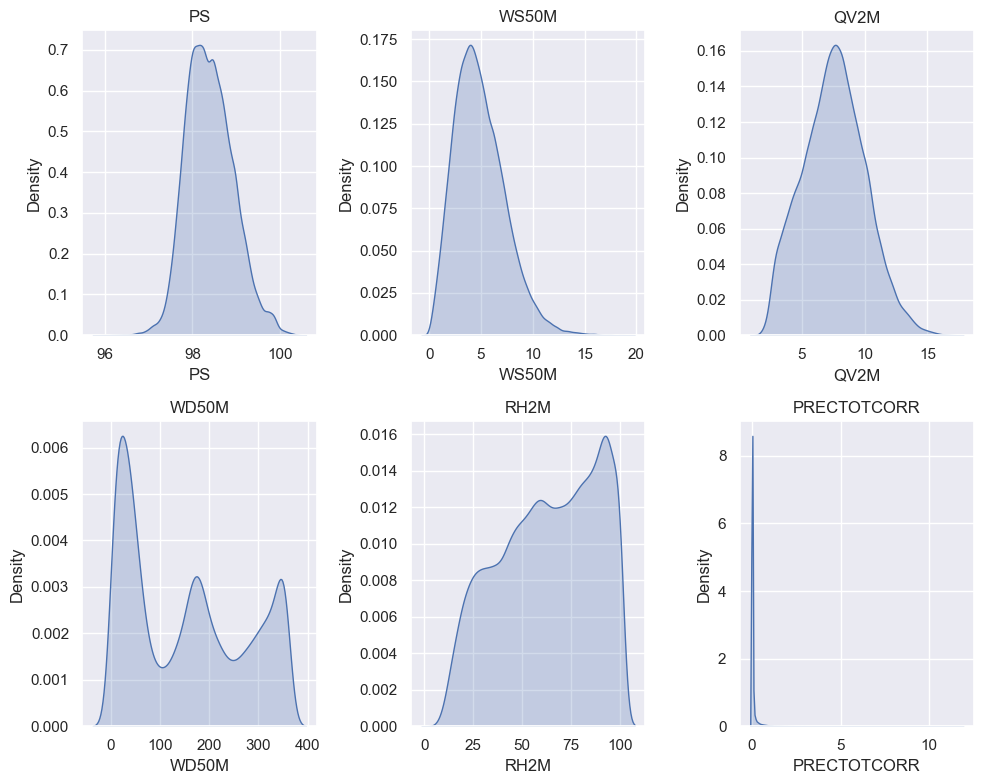

In [15]:
target_columns = ["PS", "WS50M", "QV2M", "WD50M", "RH2M", "PRECTOTCORR"]

# Create the plot
plt.figure(figsize=(10, 8))

# Get the number of subplots needed
num_subplots = len(target_columns)

# Loop through and plot each column
for i, col in enumerate(target_columns):
    # Create the subplot
    plt.subplot(2, 3, i + 1)  # Adjust the number of columns based on your preference

    # Plot the kernel density distribution
    sns.kdeplot(data[col], fill=True)

    # Set the title
    plt.title(col)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [30]:
# droping all the null values from the data
data = data.dropna()

In [34]:


# Assuming you have a DataFrame named 'data' with columns YEAR, MO, DY, and HR
data["Date/Time"] = pd.to_datetime(data["YEAR"].astype(str) + '-' + data["MO"].astype(str) + '-' + data["DY"].astype(str) + ' ' + data["HR"].astype(str), errors="coerce", format="%Y-%m-%d %H")

data = data.drop(columns=["YEAR", "MO", "DY", "HR"])
print(data)


       QV2M    RH2M  PRECTOTCORR     PS  WS50M   WD50M           Date/Time
0      5.49   77.56          0.0  98.82   1.48  234.04 2014-01-30 02:00:00
1      5.49   77.38          0.0  98.87   1.16  232.13 2014-01-30 03:00:00
2      5.49   76.94          0.0  98.92   0.60  236.73 2014-01-30 04:00:00
3      5.37   75.94          0.0  98.97   0.17   76.61 2014-01-30 05:00:00
4      5.37   80.50          0.0  99.04   1.13   87.24 2014-01-30 06:00:00
...     ...     ...          ...    ...    ...     ...                 ...
87619  3.85   87.31          0.0  99.56   9.02   19.63 2024-01-28 21:00:00
87620  3.85   90.00          0.0  99.55   8.81   20.46 2024-01-28 22:00:00
87621  3.85   92.19          0.0  99.56   8.55   21.10 2024-01-28 23:00:00
87622  3.78   96.75          0.0  99.55   7.83   20.55 2024-01-29 00:00:00
87623  3.78  100.00          0.0  99.57   7.41   18.32 2024-01-29 01:00:00

[87624 rows x 7 columns]


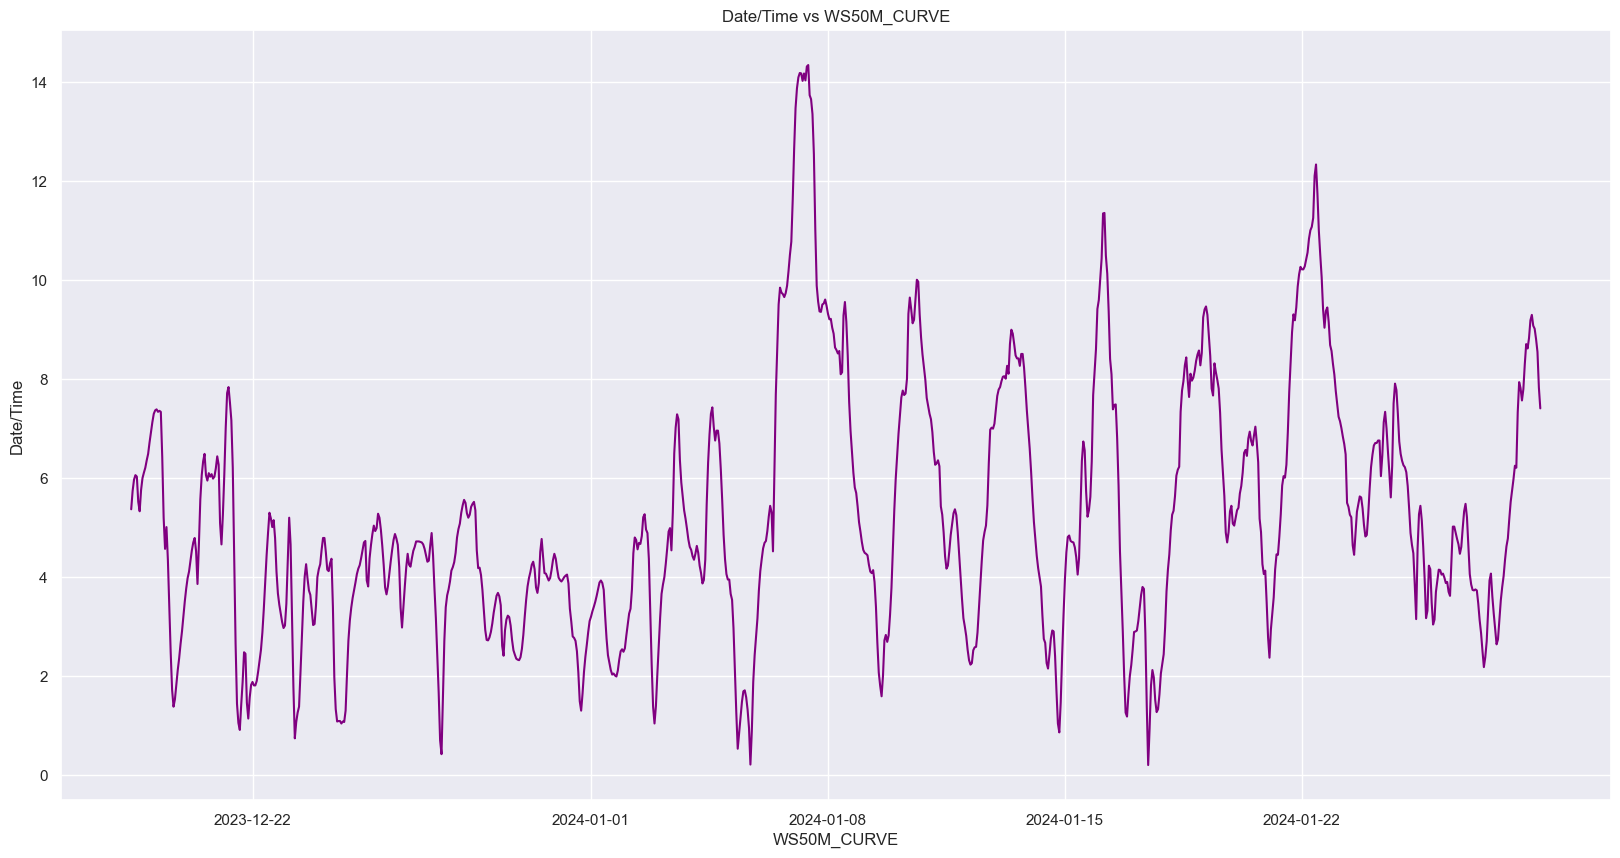

In [39]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis, considering the last 1000 data points
ax.plot(data['Date/Time'][-1000:],
        data['WS50M'][-1000:],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="WS50M_CURVE",
       ylabel="Date/Time",
       title="Date/Time vs WS50M_CURVE")

plt.show()


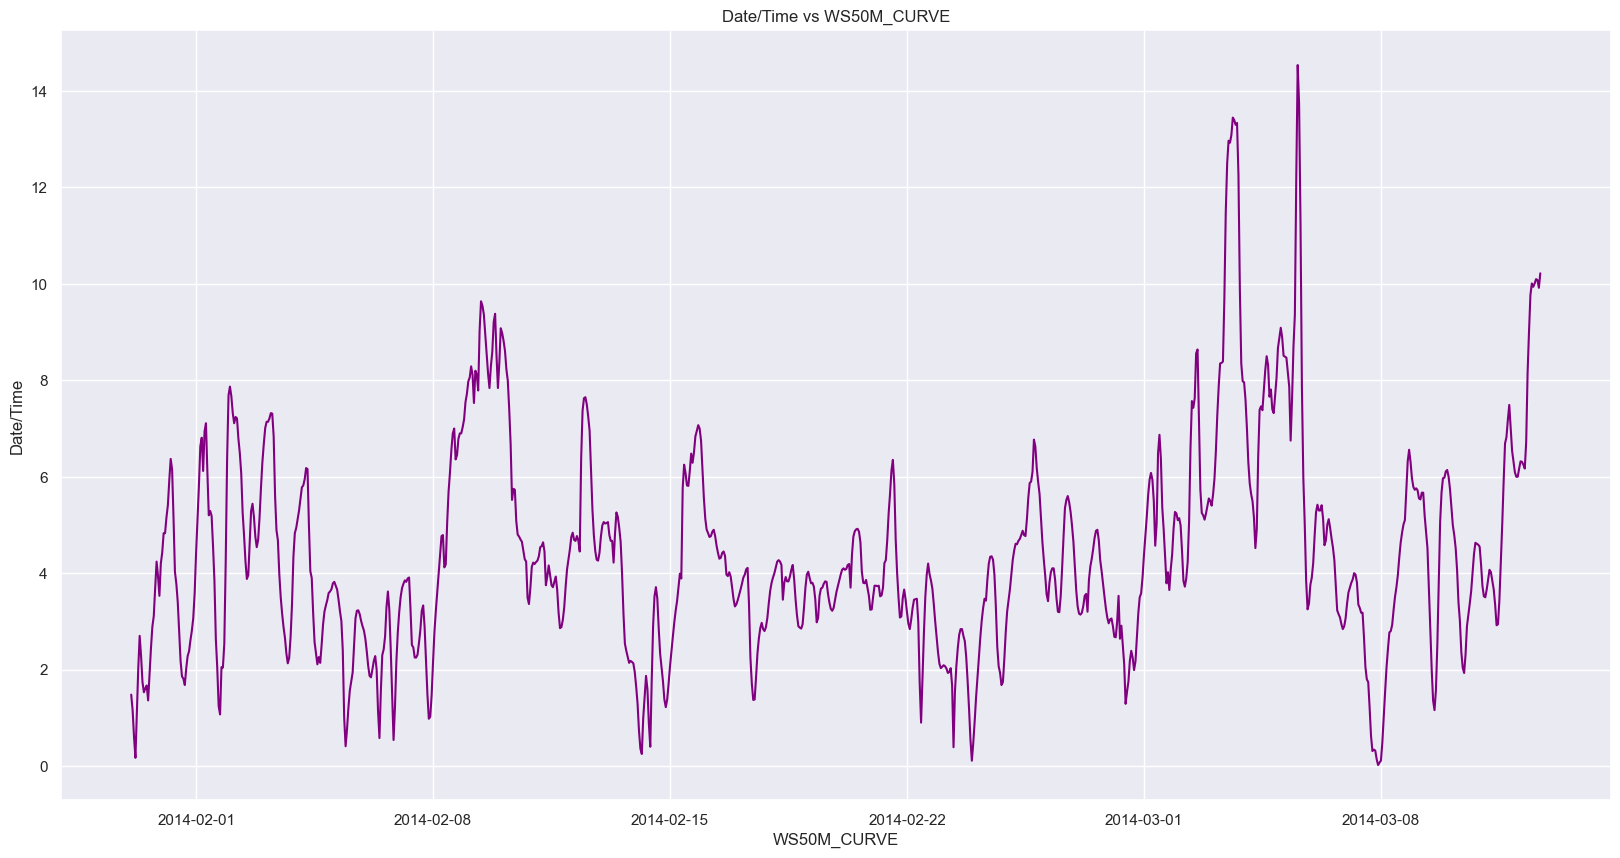

In [37]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['WS50M'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="WS50M_CURVE",
       ylabel="Date/Time",
       title="Date/Time vs WS50M_CURVE")

plt.show()

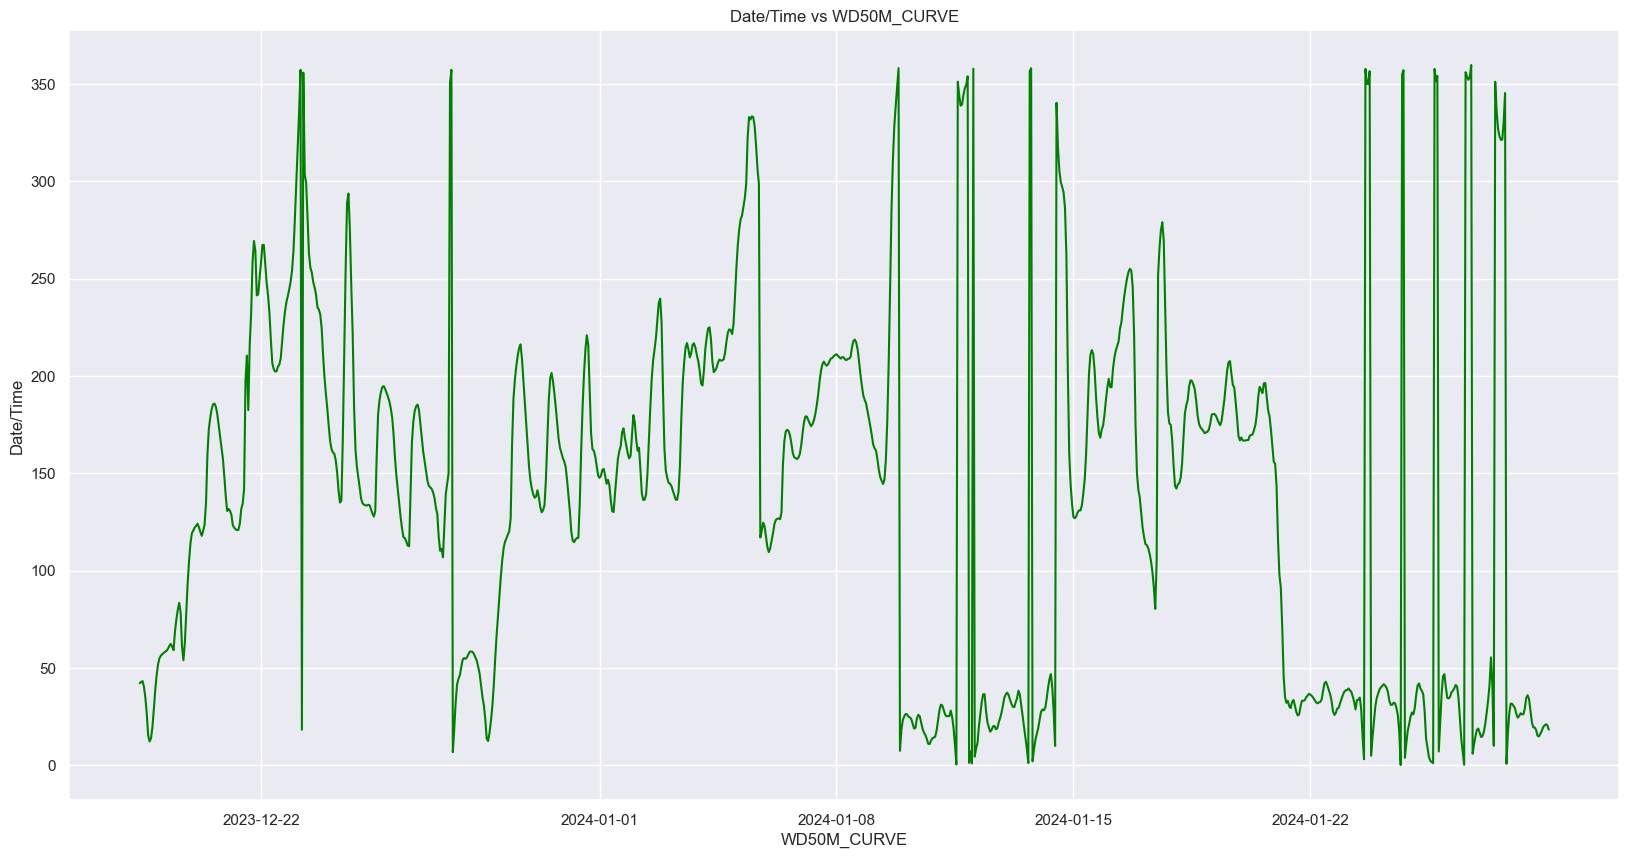

In [40]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis, considering the last 1000 data points
ax.plot(data['Date/Time'][-1000:],
        data['WD50M'][-1000:],
        color='GREEN')

# Set title and labels for axes
ax.set(xlabel="WD50M_CURVE",
       ylabel="Date/Time",
       title="Date/Time vs WD50M_CURVE")

plt.show()


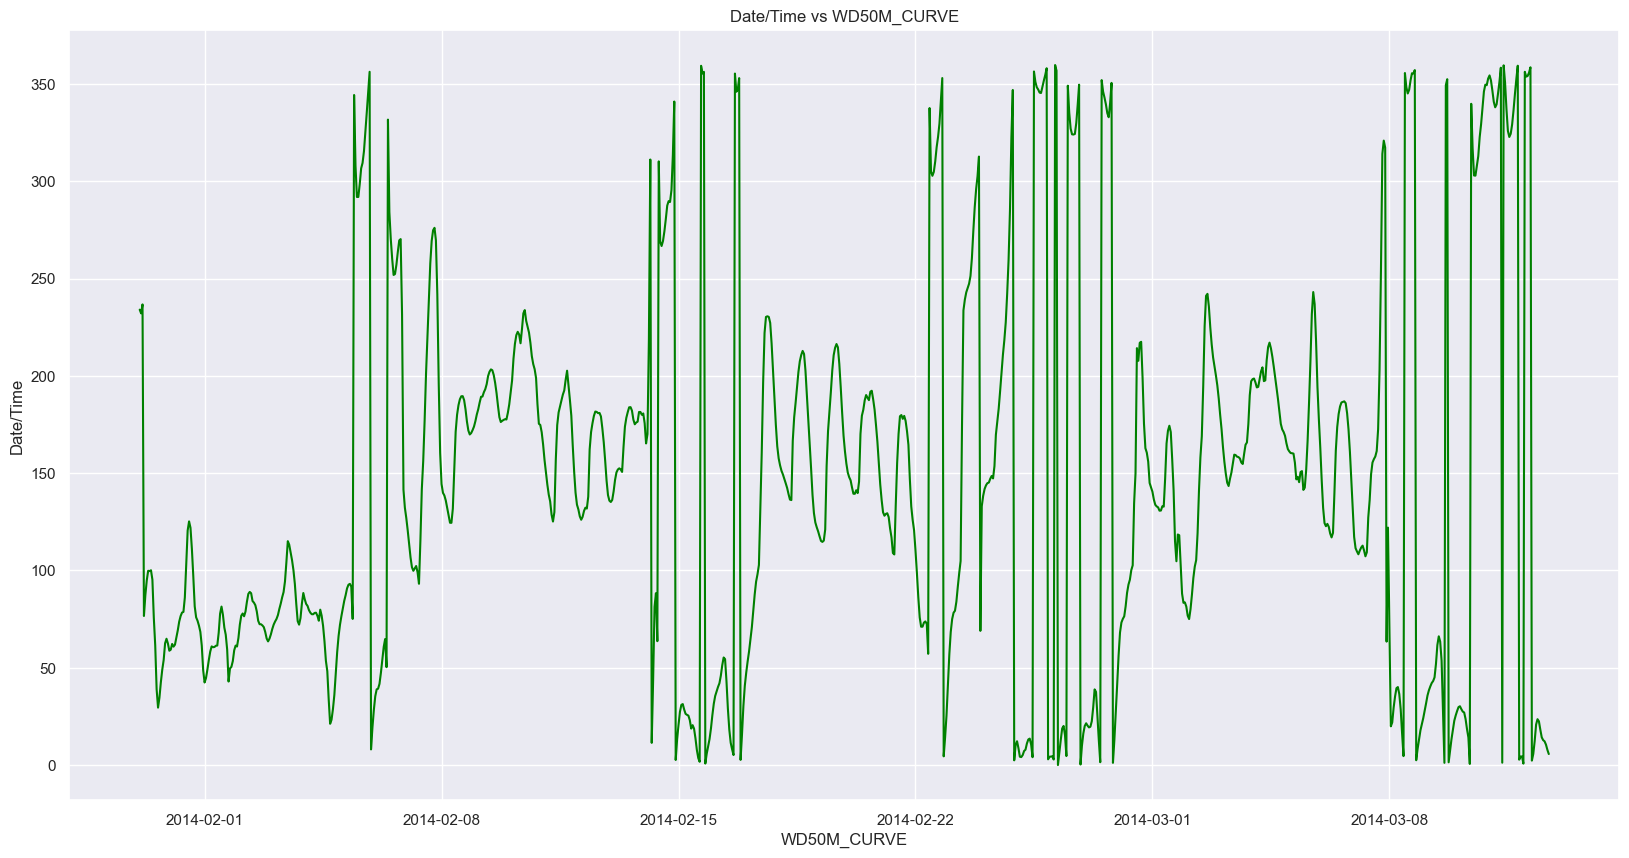

In [41]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['WD50M'][0:1000],
        color='GREEN')

# Set title and labels for axes
ax.set(xlabel="WD50M_CURVE",
       ylabel="Date/Time",
       title="Date/Time vs WD50M_CURVE")

plt.show()

In [118]:
# Droping all the irrelavent features that dosent affect the target variable.

data.tail()

QV2M    RH2M  PRECTOTCORR     PS  WS50M  WD50M           Date/Time
87619  3.85   87.31          0.0  99.56   9.02  19.63 2024-01-28 21:00:00
87620  3.85   90.00          0.0  99.55   8.81  20.46 2024-01-28 22:00:00
87621  3.85   92.19          0.0  99.56   8.55  21.10 2024-01-28 23:00:00
87622  3.78   96.75          0.0  99.55   7.83  20.55 2024-01-29 00:00:00
87623  3.78  100.00          0.0  99.57   7.41  18.32 2024-01-29 01:00:00

In [142]:
df1 = data.copy()
df2=data.copy()

print(df1)
print(df2)

       QV2M    RH2M  PRECTOTCORR     PS  WS50M   WD50M           Date/Time
0      5.49   77.56          0.0  98.82   1.48  234.04 2014-01-30 02:00:00
1      5.49   77.38          0.0  98.87   1.16  232.13 2014-01-30 03:00:00
2      5.49   76.94          0.0  98.92   0.60  236.73 2014-01-30 04:00:00
3      5.37   75.94          0.0  98.97   0.17   76.61 2014-01-30 05:00:00
4      5.37   80.50          0.0  99.04   1.13   87.24 2014-01-30 06:00:00
...     ...     ...          ...    ...    ...     ...                 ...
87619  3.85   87.31          0.0  99.56   9.02   19.63 2024-01-28 21:00:00
87620  3.85   90.00          0.0  99.55   8.81   20.46 2024-01-28 22:00:00
87621  3.85   92.19          0.0  99.56   8.55   21.10 2024-01-28 23:00:00
87622  3.78   96.75          0.0  99.55   7.83   20.55 2024-01-29 00:00:00
87623  3.78  100.00          0.0  99.57   7.41   18.32 2024-01-29 01:00:00

[87624 rows x 7 columns]
       QV2M    RH2M  PRECTOTCORR     PS  WS50M   WD50M           Date/Time

In [143]:



from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [144]:
# converting the Data/Time as the index for proper shape of the input.
df1 = df1.set_index('Date/Time')

In [145]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [147]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised1(data, lag=1):
    df1 = DataFrame(data)
    columns = [df1.shift(i) for i in range(1, lag+1)]
    columns.append(df1)
    df1 = concat(columns, axis=1)
    df1.fillna(0, inplace=True)
    return df1

In [148]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised2(data, lag=1):
    df2 = DataFrame(data)
    columns = [df2.shift(i) for i in range(1, lag+1)]
    columns.append(df2)
    df2 = concat(columns, axis=1)
    df2.fillna(0, inplace=True)
    return df2

In [149]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [150]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [169]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [152]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [153]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    model = tf.keras.models.Sequential()
    
    # Use LSTM layer with CuDNN backend if available
    if tf.test.is_gpu_available(cuda_only=True):
        model.add(tf.keras.layers.LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    else:
        model.add(tf.keras.layers.LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True, implementation=2))
    
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    
    # Print model summary after training
    print(model.summary())
    
    return model

In [154]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [162]:
'''Drop all the features as we will not be having any in production'''
# del df1['QV2M']
# del df1['RH2M']
# del df1['PRECTOTCORR']
# del df1['PS']
# del df1['WS50M']
df1.head()





WD50M
Date/Time                  
2014-01-30 02:00:00  234.04
2014-01-30 03:00:00  232.13
2014-01-30 04:00:00  236.73
2014-01-30 05:00:00   76.61
2014-01-30 06:00:00   87.24

In [163]:
for i in range(0,10):
  df1 = df1[:-1]
df1.tail()

WD50M
Date/Time                 
2024-01-28 11:00:00  34.04
2024-01-28 12:00:00  28.28
2024-01-28 13:00:00  22.20
2024-01-28 14:00:00  19.51
2024-01-28 15:00:00  19.43

In [164]:
# transform data to be stationary
raw_values = df1.values
diff_values = difference(raw_values, 1)

In [166]:
# transform data to be supervised learning
supervised = timeseries_to_supervised1(diff_values, lag_exp)
supervised_values = supervised.values

In [167]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [170]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [171]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


86613/86613 [==============================] - 134s 2ms/step - loss: 0.0328
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 10)                   1400      
                                                                 
 dense (Dense)               (1, 1)                    11        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [172]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 [==============================] - 2s 2s/step
Hour=1, Predicted=27.960261, Expected=39.970000
1/1 [==============================] - 0s 23ms/step
Hour=2, Predicted=50.107039, Expected=42.180000
1/1 [==============================] - 0s 32ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=3, Predicted=31.128083, Expected=43.660000
1/1 [==============================] - 0s 35ms/step
Hour=4, Predicted=26.256342, Expected=44.730000
1/1 [==============================] - 0s 36ms/step
Hour=5, Predicted=40.976559, Expected=45.440000
1/1 [==============================] - 0s 26ms/step
Hour=6, Predicted=44.689489, Expected=45.400000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 94ms/step
Hour=7, Predicted=44.029876, Expected=46.460000
1/1 [==============================] - 0s 39ms/step
Hour=8, Predicted=47.452218, Expected=48.210000
1/1 [==============================] - 0s 20ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=9, Predicted=51.033443, Expected=48.560000
1/1 [==============================] - 0s 21ms/step
Hour=10, Predicted=51.814191, Expected=43.110000
1/1 [==============================] - 0s 23ms/step
Hour=11, Predicted=46.572823, Expected=42.170000
1/1 [==============================] - 0s 20ms/step
Hour=12, Predicted=44.937476, Expected=42.790000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=13, Predicted=44.421039, Expected=43.250000
1/1 [==============================] - 0s 24ms/step
Hour=14, Predicted=44.092788, Expected=40.400000
1/1 [==============================] - 0s 26ms/step
Hour=15, Predicted=40.420701, Expected=34.860000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=16, Predicted=34.397978, Expected=26.490000
1/1 [==============================] - 0s 20ms/step
Hour=17, Predicted=26.052610, Expected=15.380000
1/1 [==============================] - 0s 20ms/step
Hour=18, Predicted=15.088717, Expected=12.230000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=19, Predicted=12.991777, Expected=13.870000
1/1 [==============================] - 0s 31ms/step
Hour=20, Predicted=14.735190, Expected=19.410000
1/1 [==============================] - 0s 19ms/step
Hour=21, Predicted=20.165636, Expected=28.560000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=22, Predicted=29.105020, Expected=38.460000
1/1 [==============================] - 0s 24ms/step
Hour=23, Predicted=38.369212, Expected=46.170000
1/1 [==============================] - 0s 19ms/step
Hour=24, Predicted=44.734197, Expected=51.940000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=25, Predicted=50.945444, Expected=54.970000
1/1 [==============================] - 0s 26ms/step
Hour=26, Predicted=53.377834, Expected=56.310000
1/1 [==============================] - 0s 25ms/step
Hour=27, Predicted=53.194890, Expected=57.090000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=28, Predicted=54.222774, Expected=57.720000
1/1 [==============================] - 0s 26ms/step
Hour=29, Predicted=55.864097, Expected=58.310000
1/1 [==============================] - 0s 30ms/step
Hour=30, Predicted=56.900194, Expected=58.800000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 27ms/step
Hour=31, Predicted=57.899348, Expected=59.790000
1/1 [==============================] - 0s 23ms/step
Hour=32, Predicted=59.578503, Expected=61.390000
1/1 [==============================] - 0s 21ms/step
Hour=33, Predicted=61.718526, Expected=62.350000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=34, Predicted=63.050148, Expected=60.900000
1/1 [==============================] - 0s 24ms/step
Hour=35, Predicted=61.801266, Expected=59.140000
1/1 [==============================] - 0s 25ms/step
Hour=36, Predicted=60.075438, Expected=68.710000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=37, Predicted=69.567460, Expected=75.020000
1/1 [==============================] - 0s 24ms/step
Hour=38, Predicted=75.746087, Expected=79.850000
1/1 [==============================] - 0s 22ms/step
Hour=39, Predicted=80.457237, Expected=83.460000
1/1 [==============================] - 0s 18ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=40, Predicted=83.983631, Expected=78.490000
1/1 [==============================] - 0s 26ms/step
Hour=41, Predicted=78.906804, Expected=60.820000
1/1 [==============================] - 0s 24ms/step
Hour=42, Predicted=61.209520, Expected=53.950000
1/1 [==============================] - 0s 18ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=43, Predicted=54.274458, Expected=62.880000
1/1 [==============================] - 0s 24ms/step
Hour=44, Predicted=63.046611, Expected=78.320000
1/1 [==============================] - 0s 28ms/step
Hour=45, Predicted=78.294627, Expected=93.410000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=46, Predicted=93.127963, Expected=105.060000
1/1 [==============================] - 0s 74ms/step
Hour=47, Predicted=104.424026, Expected=114.150000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 34ms/step
Hour=48, Predicted=113.286731, Expected=119.240000
1/1 [==============================] - 0s 25ms/step
Hour=49, Predicted=118.230021, Expected=120.610000
1/1 [==============================] - 0s 25ms/step
Hour=50, Predicted=119.393113, Expected=122.140000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=51, Predicted=120.814658, Expected=122.970000
1/1 [==============================] - 0s 19ms/step
Hour=52, Predicted=121.729102, Expected=124.080000
1/1 [==============================] - 0s 18ms/step
Hour=53, Predicted=123.001052, Expected=122.260000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=54, Predicted=121.369788, Expected=119.830000
1/1 [==============================] - 0s 24ms/step
Hour=55, Predicted=119.172749, Expected=117.840000
1/1 [==============================] - 0s 24ms/step
Hour=56, Predicted=117.436242, Expected=120.450000
1/1 [==============================] - 0s 18ms/step
Hour=57, Predicted=120.284758, Expected=123.660000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=58, Predicted=123.700915, Expected=134.670000
1/1 [==============================] - 0s 35ms/step
Hour=59, Predicted=134.878228, Expected=159.410000
1/1 [==============================] - 0s 23ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=60, Predicted=159.738677, Expected=172.590000
1/1 [==============================] - 0s 31ms/step
Hour=61, Predicted=172.991351, Expected=178.450000
1/1 [==============================] - 0s 22ms/step
Hour=62, Predicted=178.885502, Expected=182.890000
1/1 [==============================] - 0s 23ms/step
Hour=63, Predicted=183.327235, Expected=185.390000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=64, Predicted=185.791412, Expected=185.770000
1/1 [==============================] - 0s 23ms/step
Hour=65, Predicted=186.106837, Expected=184.210000
1/1 [==============================] - 0s 19ms/step
Hour=66, Predicted=184.455911, Expected=180.370000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=67, Predicted=180.494264, Expected=174.720000
1/1 [==============================] - 0s 22ms/step
Hour=68, Predicted=174.700708, Expected=168.820000
1/1 [==============================] - 0s 24ms/step
Hour=69, Predicted=168.643712, Expected=163.570000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=70, Predicted=163.225182, Expected=157.360000
1/1 [==============================] - 0s 29ms/step
Hour=71, Predicted=156.858536, Expected=148.290000
1/1 [==============================] - 0s 23ms/step
Hour=72, Predicted=147.663591, Expected=138.300000
1/1 [==============================] - 0s 23ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=73, Predicted=137.575592, Expected=130.600000
1/1 [==============================] - 0s 25ms/step
Hour=74, Predicted=129.808602, Expected=131.700000
1/1 [==============================] - 0s 29ms/step
Hour=75, Predicted=130.888061, Expected=130.720000
1/1 [==============================] - 0s 21ms/step
Hour=76, Predicted=129.933783, Expected=128.790000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=77, Predicted=128.065093, Expected=123.340000
1/1 [==============================] - 0s 27ms/step
Hour=78, Predicted=122.705306, Expected=122.030000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 56ms/step
Hour=79, Predicted=121.508483, Expected=121.210000
1/1 [==============================] - 0s 36ms/step
Hour=80, Predicted=120.815123, Expected=120.760000
1/1 [==============================] - 0s 22ms/step
Hour=81, Predicted=120.495195, Expected=120.950000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 27ms/step
Hour=82, Predicted=120.810794, Expected=124.210000
1/1 [==============================] - 0s 25ms/step
Hour=83, Predicted=124.184450, Expected=131.640000
1/1 [==============================] - 0s 23ms/step
Hour=84, Predicted=131.709170, Expected=134.360000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=85, Predicted=134.500314, Expected=141.790000
1/1 [==============================] - 0s 19ms/step
Hour=86, Predicted=141.975190, Expected=197.650000
1/1 [==============================] - 0s 25ms/step
Hour=87, Predicted=197.851350, Expected=210.380000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=88, Predicted=210.568581, Expected=182.470000
1/1 [==============================] - 0s 29ms/step
Hour=89, Predicted=182.618882, Expected=216.050000
1/1 [==============================] - 0s 24ms/step
Hour=90, Predicted=216.135162, Expected=231.940000
1/1 [==============================] - 0s 23ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=91, Predicted=231.942306, Expected=258.370000
1/1 [==============================] - 0s 29ms/step
Hour=92, Predicted=258.276871, Expected=269.270000
1/1 [==============================] - 0s 27ms/step
Hour=93, Predicted=269.075083, Expected=264.170000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=94, Predicted=263.874276, Expected=241.330000
1/1 [==============================] - 0s 22ms/step
Hour=95, Predicted=240.942569, Expected=241.890000
1/1 [==============================] - 0s 21ms/step
Hour=96, Predicted=241.425567, Expected=250.400000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=97, Predicted=249.876695, Expected=257.990000
1/1 [==============================] - 0s 26ms/step
Hour=98, Predicted=257.429195, Expected=267.290000
1/1 [==============================] - 0s 24ms/step
Hour=99, Predicted=266.715044, Expected=267.290000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=100, Predicted=266.723699, Expected=257.620000
1/1 [==============================] - 0s 22ms/step
Hour=101, Predicted=257.083138, Expected=247.840000
1/1 [==============================] - 0s 23ms/step
Hour=102, Predicted=247.350641, Expected=241.270000
1/1 [==============================] - 0s 21ms/step
Hour=103, Predicted=240.842612, Expected=232.030000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=104, Predicted=231.674580, Expected=218.390000
1/1 [==============================] - 0s 39ms/step
Hour=105, Predicted=218.111722, Expected=206.570000
1/1 [==============================] - 0s 26ms/step
Hour=106, Predicted=206.369098, Expected=203.530000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=107, Predicted=203.401718, Expected=202.230000
1/1 [==============================] - 0s 20ms/step
Hour=108, Predicted=202.164910, Expected=202.350000
1/1 [==============================] - 0s 23ms/step
Hour=109, Predicted=202.334775, Expected=204.750000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=110, Predicted=204.768271, Expected=205.790000
1/1 [==============================] - 0s 48ms/step
Hour=111, Predicted=205.823484, Expected=209.120000
1/1 [==============================] - 0s 19ms/step
Hour=112, Predicted=209.149923, Expected=217.980000

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 


1/1 [==============================] - 0s 46ms/step
Hour=113, Predicted=217.988455, Expected=226.520000
1/1 [==============================] - 0s 24ms/step
Hour=114, Predicted=226.491260, Expected=232.960000
1/1 [==============================] - 0s 18ms/step
Hour=115, Predicted=232.881657, Expected=237.870000
1/1 [==============================] - 0s 24ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=116, Predicted=237.733669, Expected=240.930000
1/1 [==============================] - 0s 26ms/step
Hour=117, Predicted=240.731683, Expected=244.410000
1/1 [==============================] - 0s 29ms/step
Hour=118, Predicted=244.150208, Expected=248.490000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=119, Predicted=248.173412, Expected=254.140000
1/1 [==============================] - 0s 24ms/step
Hour=120, Predicted=253.774715, Expected=263.910000
1/1 [==============================] - 0s 23ms/step
Hour=121, Predicted=263.506756, Expected=280.520000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=122, Predicted=280.091383, Expected=299.040000
1/1 [==============================] - 0s 28ms/step
Hour=123, Predicted=298.599570, Expected=316.770000
1/1 [==============================] - 0s 19ms/step
Hour=124, Predicted=316.331333, Expected=335.240000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=125, Predicted=334.815966, Expected=357.190000
1/1 [==============================] - 0s 26ms/step
Hour=126, Predicted=356.792061, Expected=18.270000
1/1 [==============================] - 0s 30ms/step
Hour=127, Predicted=17.907598, Expected=355.740000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=128, Predicted=355.420085, Expected=303.340000
1/1 [==============================] - 0s 33ms/step
Hour=129, Predicted=303.066640, Expected=299.260000
1/1 [==============================] - 0s 21ms/step
Hour=130, Predicted=299.034209, Expected=281.440000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=131, Predicted=281.259626, Expected=262.790000
1/1 [==============================] - 0s 24ms/step
Hour=132, Predicted=262.649946, Expected=255.610000
1/1 [==============================] - 0s 22ms/step
Hour=133, Predicted=255.502566, Expected=253.140000
1/1 [==============================] - 0s 25ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=134, Predicted=253.055457, Expected=248.280000
1/1 [==============================] - 0s 26ms/step
Hour=135, Predicted=248.207319, Expected=245.410000
1/1 [==============================] - 0s 24ms/step
Hour=136, Predicted=245.337673, Expected=241.720000
1/1 [==============================] - 0s 24ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=137, Predicted=241.636952, Expected=235.240000
1/1 [==============================] - 0s 25ms/step
Hour=138, Predicted=235.136334, Expected=234.090000
1/1 [==============================] - 0s 21ms/step
Hour=139, Predicted=233.957730, Expected=231.570000
1/1 [==============================] - 0s 22ms/step
Hour=140, Predicted=231.403483, Expected=224.580000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=141, Predicted=224.376230, Expected=210.640000
1/1 [==============================] - 0s 46ms/step
Hour=142, Predicted=210.398640, Expected=199.350000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=143, Predicted=199.073247, Expected=190.810000
1/1 [==============================] - 0s 25ms/step
Hour=144, Predicted=190.502205, Expected=183.120000
1/1 [==============================] - 0s 19ms/step
Hour=145, Predicted=182.787316, Expected=174.430000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=146, Predicted=174.079822, Expected=166.610000
1/1 [==============================] - 0s 24ms/step
Hour=147, Predicted=166.250469, Expected=162.330000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 33ms/step
Hour=148, Predicted=161.969474, Expected=160.680000
1/1 [==============================] - 0s 24ms/step
Hour=149, Predicted=160.326541, Expected=159.990000
1/1 [==============================] - 0s 26ms/step
Hour=150, Predicted=159.650926, Expected=156.620000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=151, Predicted=156.301466, Expected=150.230000
1/1 [==============================] - 0s 24ms/step
Hour=152, Predicted=149.936660, Expected=140.850000
1/1 [==============================] - 0s 20ms/step
Hour=153, Predicted=140.584771, Expected=134.930000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=154, Predicted=134.693877, Expected=136.020000
1/1 [==============================] - 0s 24ms/step
Hour=155, Predicted=135.812052, Expected=167.840000
1/1 [==============================] - 0s 22ms/step
Hour=156, Predicted=167.657449, Expected=211.080000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=157, Predicted=210.918424, Expected=254.850000
1/1 [==============================] - 0s 28ms/step
Hour=158, Predicted=254.703704, Expected=288.820000
1/1 [==============================] - 0s 28ms/step
Hour=159, Predicted=288.682416, Expected=293.630000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=160, Predicted=293.494215, Expected=275.160000
1/1 [==============================] - 0s 24ms/step
Hour=161, Predicted=275.019221, Expected=246.210000
1/1 [==============================] - 0s 26ms/step
Hour=162, Predicted=246.058074, Expected=221.460000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=163, Predicted=221.291810, Expected=183.790000
1/1 [==============================] - 0s 28ms/step
Hour=164, Predicted=183.601779, Expected=161.910000
1/1 [==============================] - 0s 20ms/step
Hour=165, Predicted=161.699495, Expected=153.210000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=166, Predicted=152.976578, Expected=147.780000
1/1 [==============================] - 0s 28ms/step
Hour=167, Predicted=147.524572, Expected=142.130000
1/1 [==============================] - 0s 24ms/step
Hour=168, Predicted=141.854857, Expected=136.860000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=169, Predicted=136.568606, Expected=134.580000
1/1 [==============================] - 0s 34ms/step
Hour=170, Predicted=134.276705, Expected=133.860000
1/1 [==============================] - 0s 23ms/step
Hour=171, Predicted=133.549701, Expected=133.520000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=172, Predicted=133.207832, Expected=133.410000
1/1 [==============================] - 0s 39ms/step
Hour=173, Predicted=133.101007, Expected=133.810000
1/1 [==============================] - 0s 24ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=174, Predicted=133.508814, Expected=133.550000
1/1 [==============================] - 0s 20ms/step
Hour=175, Predicted=133.260617, Expected=131.510000
1/1 [==============================] - 0s 24ms/step
Hour=176, Predicted=131.235489, Expected=129.270000
1/1 [==============================] - 0s 20ms/step
Hour=177, Predicted=129.012386, Expected=127.760000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=178, Predicted=127.520133, Expected=130.490000
1/1 [==============================] - 0s 29ms/step
Hour=179, Predicted=130.267533, Expected=158.330000
1/1 [==============================] - 0s 24ms/step
Hour=180, Predicted=158.123451, Expected=180.100000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=181, Predicted=179.906863, Expected=187.440000
1/1 [==============================] - 0s 48ms/step
Hour=182, Predicted=187.256964, Expected=191.670000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 31ms/step
Hour=183, Predicted=191.493184, Expected=194.190000
1/1 [==============================] - 0s 23ms/step
Hour=184, Predicted=194.015234, Expected=194.790000
1/1 [==============================] - 0s 24ms/step
Hour=185, Predicted=194.613149, Expected=193.300000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=186, Predicted=193.117252, Expected=191.340000
1/1 [==============================] - 0s 24ms/step
Hour=187, Predicted=191.148083, Expected=189.330000
1/1 [==============================] - 0s 26ms/step
Hour=188, Predicted=189.126415, Expected=186.970000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=189, Predicted=186.753139, Expected=183.390000
1/1 [==============================] - 0s 30ms/step
Hour=190, Predicted=183.159227, Expected=178.630000
1/1 [==============================] - 0s 20ms/step
Hour=191, Predicted=178.385599, Expected=169.780000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=192, Predicted=169.523155, Expected=157.720000
1/1 [==============================] - 0s 30ms/step
Hour=193, Predicted=157.452650, Expected=148.650000
1/1 [==============================] - 0s 25ms/step
Hour=194, Predicted=148.374668, Expected=141.700000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=195, Predicted=141.419629, Expected=134.850000
1/1 [==============================] - 0s 19ms/step
Hour=196, Predicted=134.567714, Expected=127.320000
1/1 [==============================] - 0s 26ms/step
Hour=197, Predicted=127.038936, Expected=121.630000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=198, Predicted=121.353081, Expected=117.100000
1/1 [==============================] - 0s 25ms/step
Hour=199, Predicted=116.829779, Expected=116.690000
1/1 [==============================] - 0s 22ms/step
Hour=200, Predicted=116.428502, Expected=115.060000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=201, Predicted=114.808599, Expected=112.810000
1/1 [==============================] - 0s 33ms/step
Hour=202, Predicted=112.569379, Expected=112.540000
1/1 [==============================] - 0s 26ms/step
Hour=203, Predicted=112.310096, Expected=139.890000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 44ms/step
Hour=204, Predicted=139.670044, Expected=165.960000
1/1 [==============================] - 0s 24ms/step
Hour=205, Predicted=165.748586, Expected=176.600000
1/1 [==============================] - 0s 25ms/step
Hour=206, Predicted=176.395222, Expected=182.130000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=207, Predicted=181.929558, Expected=184.410000
1/1 [==============================] - 0s 25ms/step
Hour=208, Predicted=184.211395, Expected=185.270000
1/1 [==============================] - 0s 36ms/step
Hour=209, Predicted=185.070723, Expected=182.440000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 100ms/step
Hour=210, Predicted=182.237667, Expected=175.300000
1/1 [==============================] - 0s 24ms/step
Hour=211, Predicted=175.092546, Expected=167.860000
1/1 [==============================] - 0s 23ms/step
Hour=212, Predicted=167.645786, Expected=161.010000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=213, Predicted=160.787905, Expected=156.190000
1/1 [==============================] - 0s 23ms/step
Hour=214, Predicted=155.959479, Expected=150.970000
1/1 [==============================] - 0s 24ms/step
Hour=215, Predicted=150.731088, Expected=146.130000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 27ms/step
Hour=216, Predicted=145.883283, Expected=143.490000
1/1 [==============================] - 0s 42ms/step
Hour=217, Predicted=143.236537, Expected=142.770000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 34ms/step
Hour=218, Predicted=142.511263, Expected=141.940000
1/1 [==============================] - 0s 51ms/step
Hour=219, Predicted=141.677729, Expected=140.210000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=220, Predicted=139.946098, Expected=137.350000
1/1 [==============================] - 0s 22ms/step
Hour=221, Predicted=137.086389, Expected=132.280000
1/1 [==============================] - 0s 22ms/step
Hour=222, Predicted=132.018518, Expected=129.060000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=223, Predicted=128.802279, Expected=117.170000
1/1 [==============================] - 0s 28ms/step
Hour=224, Predicted=116.917343, Expected=110.170000
1/1 [==============================] - 0s 24ms/step
Hour=225, Predicted=109.923358, Expected=111.240000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=226, Predicted=110.999882, Expected=106.860000
1/1 [==============================] - 0s 30ms/step
Hour=227, Predicted=106.626452, Expected=123.020000
1/1 [==============================] - 0s 27ms/step
Hour=228, Predicted=122.792653, Expected=139.320000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=229, Predicted=139.098080, Expected=144.590000
1/1 [==============================] - 0s 71ms/step
Hour=230, Predicted=144.372406, Expected=150.020000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 35ms/step
Hour=231, Predicted=149.805382, Expected=350.360000
1/1 [==============================] - 0s 30ms/step
Hour=232, Predicted=350.146857, Expected=357.190000
1/1 [==============================] - 0s 24ms/step
Hour=233, Predicted=356.976809, Expected=6.780000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=234, Predicted=6.565282, Expected=18.810000
1/1 [==============================] - 0s 25ms/step
Hour=235, Predicted=18.592455, Expected=32.150000
1/1 [==============================] - 0s 23ms/step
Hour=236, Predicted=31.928556, Expected=41.530000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=237, Predicted=41.303898, Expected=44.430000
1/1 [==============================] - 0s 35ms/step
Hour=238, Predicted=44.198821, Expected=46.300000
1/1 [==============================] - 0s 29ms/step
Hour=239, Predicted=46.063675, Expected=50.590000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 33ms/step
Hour=240, Predicted=50.348801, Expected=54.320000
1/1 [==============================] - 0s 27ms/step
Hour=241, Predicted=54.074504, Expected=55.070000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=242, Predicted=54.821041, Expected=54.680000
1/1 [==============================] - 0s 24ms/step
Hour=243, Predicted=54.428629, Expected=55.440000
1/1 [==============================] - 0s 22ms/step
Hour=244, Predicted=55.187349, Expected=56.990000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 45ms/step
Hour=245, Predicted=56.737250, Expected=58.330000
1/1 [==============================] - 0s 38ms/step
Hour=246, Predicted=58.078296, Expected=58.470000
1/1 [==============================] - 0s 20ms/step
Hour=247, Predicted=58.220368, Expected=58.210000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 29ms/step
Hour=248, Predicted=57.963295, Expected=57.120000
1/1 [==============================] - 0s 35ms/step
Hour=249, Predicted=56.876849, Expected=55.350000
1/1 [==============================] - 0s 29ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=250, Predicted=55.110772, Expected=53.680000
1/1 [==============================] - 0s 27ms/step
Hour=251, Predicted=53.444795, Expected=50.490000
1/1 [==============================] - 0s 35ms/step
Hour=252, Predicted=50.258648, Expected=46.990000
1/1 [==============================] - 0s 23ms/step
Hour=253, Predicted=46.762082, Expected=40.960000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=254, Predicted=40.734884, Expected=35.090000
1/1 [==============================] - 0s 40ms/step
Hour=255, Predicted=34.866908, Expected=30.830000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 29ms/step
Hour=256, Predicted=30.608017, Expected=23.830000
1/1 [==============================] - 0s 77ms/step
Hour=257, Predicted=23.608205, Expected=13.720000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 26ms/step
Hour=258, Predicted=13.497484, Expected=12.480000
1/1 [==============================] - 0s 26ms/step
Hour=259, Predicted=12.255943, Expected=16.610000
1/1 [==============================] - 0s 25ms/step
Hour=260, Predicted=16.383710, Expected=22.760000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=261, Predicted=22.530971, Expected=30.250000
1/1 [==============================] - 0s 22ms/step
Hour=262, Predicted=30.017927, Expected=40.780000
1/1 [==============================] - 0s 21ms/step
Hour=263, Predicted=40.544774, Expected=54.310000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=264, Predicted=54.071750, Expected=66.460000
1/1 [==============================] - 0s 24ms/step
Hour=265, Predicted=66.219031, Expected=76.510000
1/1 [==============================] - 0s 22ms/step
Hour=266, Predicted=76.266790, Expected=86.740000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=267, Predicted=86.495153, Expected=96.740000
1/1 [==============================] - 0s 27ms/step
Hour=268, Predicted=96.494204, Expected=105.200000
1/1 [==============================] - 0s 23ms/step
Hour=269, Predicted=104.953968, Expected=111.510000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=270, Predicted=111.264449, Expected=114.850000
1/1 [==============================] - 0s 27ms/step
Hour=271, Predicted=114.605568, Expected=116.620000
1/1 [==============================] - 0s 27ms/step
Hour=272, Predicted=116.377245, Expected=118.560000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 32ms/step
Hour=273, Predicted=118.319338, Expected=120.180000
1/1 [==============================] - 0s 40ms/step
Hour=274, Predicted=119.941689, Expected=126.840000
1/1 [==============================] - 0s 28ms/step
Hour=275, Predicted=126.604149, Expected=164.970000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=276, Predicted=164.736525, Expected=188.300000
1/1 [==============================] - 0s 29ms/step
Hour=277, Predicted=188.068691, Expected=198.120000
1/1 [==============================] - 0s 26ms/step
Hour=278, Predicted=197.890503, Expected=204.950000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 31ms/step
Hour=279, Predicted=204.721844, Expected=210.460000
1/1 [==============================] - 0s 24ms/step
Hour=280, Predicted=210.232655, Expected=214.350000
1/1 [==============================] - 0s 30ms/step
Hour=281, Predicted=214.122909, Expected=216.150000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=282, Predicted=215.922594, Expected=208.950000
1/1 [==============================] - 0s 33ms/step
Hour=283, Predicted=208.721769, Expected=198.200000
1/1 [==============================] - 0s 33ms/step
Hour=284, Predicted=197.970500, Expected=186.870000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=285, Predicted=186.638901, Expected=175.760000
1/1 [==============================] - 0s 67ms/step
Hour=286, Predicted=175.527075, Expected=164.740000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 35ms/step
Hour=287, Predicted=164.505161, Expected=153.520000
1/1 [==============================] - 0s 26ms/step
Hour=288, Predicted=153.283287, Expected=146.360000
1/1 [==============================] - 0s 19ms/step
Hour=289, Predicted=146.121576, Expected=142.180000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=290, Predicted=141.940131, Expected=139.160000
1/1 [==============================] - 0s 28ms/step
Hour=291, Predicted=138.919042, Expected=137.410000
1/1 [==============================] - 0s 21ms/step
Hour=292, Predicted=137.168357, Expected=138.000000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=293, Predicted=137.758120, Expected=141.290000
1/1 [==============================] - 0s 23ms/step
Hour=294, Predicted=141.048302, Expected=137.700000
1/1 [==============================] - 0s 26ms/step
Hour=295, Predicted=137.458904, Expected=132.610000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=296, Predicted=132.369850, Expected=129.930000
1/1 [==============================] - 0s 27ms/step
Hour=297, Predicted=129.691072, Expected=131.040000
1/1 [==============================] - 0s 22ms/step
Hour=298, Predicted=130.802481, Expected=133.750000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=299, Predicted=133.513964, Expected=146.780000
1/1 [==============================] - 0s 24ms/step
Hour=300, Predicted=146.545436, Expected=166.500000
1/1 [==============================] - 0s 22ms/step
Hour=301, Predicted=166.266793, Expected=187.370000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=302, Predicted=187.137950, Expected=198.640000
1/1 [==============================] - 0s 54ms/step
Hour=303, Predicted=198.408846, Expected=201.520000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 29ms/step
Hour=304, Predicted=201.289413, Expected=197.260000
1/1 [==============================] - 0s 26ms/step
Hour=305, Predicted=197.029649, Expected=190.940000
1/1 [==============================] - 0s 26ms/step
Hour=306, Predicted=190.709537, Expected=183.690000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=307, Predicted=183.459112, Expected=175.440000
1/1 [==============================] - 0s 23ms/step
Hour=308, Predicted=175.208396, Expected=167.630000
1/1 [==============================] - 0s 24ms/step
Hour=309, Predicted=167.397467, Expected=162.900000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 29ms/step
Hour=310, Predicted=162.666377, Expected=160.330000
1/1 [==============================] - 0s 24ms/step
Hour=311, Predicted=160.095219, Expected=157.830000
1/1 [==============================] - 0s 22ms/step
Hour=312, Predicted=157.594059, Expected=155.950000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=313, Predicted=155.712994, Expected=153.190000
1/1 [==============================] - 0s 32ms/step
Hour=314, Predicted=152.952068, Expected=146.500000
1/1 [==============================] - 0s 24ms/step
Hour=315, Predicted=146.261347, Expected=138.620000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=316, Predicted=138.380872, Expected=130.220000
1/1 [==============================] - 0s 31ms/step
Hour=317, Predicted=129.980661, Expected=119.860000
1/1 [==============================] - 0s 25ms/step
Hour=318, Predicted=119.620709, Expected=115.420000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=319, Predicted=115.181020, Expected=114.630000
1/1 [==============================] - 0s 76ms/step
Hour=320, Predicted=114.391547, Expected=115.970000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 33ms/step
Hour=321, Predicted=115.732262, Expected=116.770000
1/1 [==============================] - 0s 30ms/step
Hour=322, Predicted=116.533092, Expected=116.800000
1/1 [==============================] - 0s 24ms/step
Hour=323, Predicted=116.563995, Expected=135.000000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=324, Predicted=134.764902, Expected=161.820000
1/1 [==============================] - 0s 25ms/step
Hour=325, Predicted=161.585741, Expected=184.210000
1/1 [==============================] - 0s 24ms/step
Hour=326, Predicted=183.976486, Expected=201.160000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=327, Predicted=200.927067, Expected=213.540000
1/1 [==============================] - 0s 30ms/step
Hour=328, Predicted=213.307463, Expected=220.860000
1/1 [==============================] - 0s 24ms/step
Hour=329, Predicted=220.627656, Expected=216.030000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=330, Predicted=215.797635, Expected=193.200000
1/1 [==============================] - 0s 22ms/step
Hour=331, Predicted=192.967421, Expected=170.450000
1/1 [==============================] - 0s 26ms/step
Hour=332, Predicted=170.217029, Expected=162.310000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=333, Predicted=162.076485, Expected=161.510000
1/1 [==============================] - 0s 30ms/step
Hour=334, Predicted=161.275850, Expected=158.550000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 49ms/step
Hour=335, Predicted=158.315149, Expected=153.640000
1/1 [==============================] - 0s 26ms/step
Hour=336, Predicted=153.404437, Expected=148.790000
1/1 [==============================] - 0s 22ms/step
Hour=337, Predicted=148.553766, Expected=147.670000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=338, Predicted=147.433183, Expected=148.710000
1/1 [==============================] - 0s 27ms/step
Hour=339, Predicted=148.472704, Expected=151.730000
1/1 [==============================] - 0s 23ms/step
Hour=340, Predicted=151.492379, Expected=152.180000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=341, Predicted=151.942214, Expected=148.680000
1/1 [==============================] - 0s 28ms/step
Hour=342, Predicted=148.442206, Expected=144.590000
1/1 [==============================] - 0s 25ms/step
Hour=343, Predicted=144.352356, Expected=146.630000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=344, Predicted=146.392652, Expected=143.910000
1/1 [==============================] - 0s 25ms/step
Hour=345, Predicted=143.673060, Expected=135.900000
1/1 [==============================] - 0s 25ms/step
Hour=346, Predicted=135.663555, Expected=130.510000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 27ms/step
Hour=347, Predicted=130.274097, Expected=130.070000
1/1 [==============================] - 0s 30ms/step
Hour=348, Predicted=129.834653, Expected=139.820000
1/1 [==============================] - 0s 27ms/step
Hour=349, Predicted=139.585173, Expected=148.310000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=350, Predicted=148.075646, Expected=157.140000
1/1 [==============================] - 0s 31ms/step
Hour=351, Predicted=156.906019, Expected=161.300000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=352, Predicted=161.066296, Expected=163.870000
1/1 [==============================] - 0s 30ms/step
Hour=353, Predicted=163.636446, Expected=171.000000
1/1 [==============================] - 0s 19ms/step
Hour=354, Predicted=170.766458, Expected=173.070000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=355, Predicted=172.836360, Expected=167.980000
1/1 [==============================] - 0s 21ms/step
Hour=356, Predicted=167.746143, Expected=163.910000
1/1 [==============================] - 0s 24ms/step
Hour=357, Predicted=163.675832, Expected=160.160000
1/1 [==============================] - 0s 22ms/step
Hour=358, Predicted=159.925452, Expected=157.600000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 30ms/step
Hour=359, Predicted=157.365034, Expected=158.890000
1/1 [==============================] - 0s 30ms/step
Hour=360, Predicted=158.654597, Expected=169.530000
1/1 [==============================] - 0s 39ms/step
Hour=361, Predicted=169.294183, Expected=179.830000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=362, Predicted=179.593813, Expected=176.180000
1/1 [==============================] - 0s 31ms/step
Hour=363, Predicted=175.943506, Expected=167.220000
1/1 [==============================] - 0s 21ms/step
Hour=364, Predicted=166.983290, Expected=161.570000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 27ms/step
Hour=365, Predicted=161.333155, Expected=163.080000
1/1 [==============================] - 0s 26ms/step
Hour=366, Predicted=162.843135, Expected=151.890000
1/1 [==============================] - 0s 26ms/step
Hour=367, Predicted=151.653204, Expected=139.670000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=368, Predicted=139.433361, Expected=136.250000
1/1 [==============================] - 0s 25ms/step
Hour=369, Predicted=136.013596, Expected=136.470000
1/1 [==============================] - 0s 23ms/step
Hour=370, Predicted=136.233884, Expected=139.030000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 27ms/step
Hour=371, Predicted=138.794214, Expected=150.150000
1/1 [==============================] - 0s 26ms/step
Hour=372, Predicted=149.914546, Expected=167.060000
1/1 [==============================] - 0s 26ms/step
Hour=373, Predicted=166.824874, Expected=183.710000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=374, Predicted=183.475172, Expected=198.460000
1/1 [==============================] - 0s 32ms/step
Hour=375, Predicted=198.225416, Expected=207.930000
1/1 [==============================] - 0s 24ms/step
Hour=376, Predicted=207.695598, Expected=213.490000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=377, Predicted=213.255705, Expected=219.620000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 112ms/step
Hour=378, Predicted=219.385736, Expected=228.330000
1/1 [==============================] - 0s 26ms/step
Hour=379, Predicted=228.095686, Expected=237.560000
1/1 [==============================] - 0s 20ms/step
Hour=380, Predicted=237.325575, Expected=239.660000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=381, Predicted=239.425400, Expected=227.290000
1/1 [==============================] - 0s 24ms/step
Hour=382, Predicted=227.055168, Expected=192.580000
1/1 [==============================] - 0s 21ms/step
Hour=383, Predicted=192.344925, Expected=162.680000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=384, Predicted=162.444657, Expected=151.270000
1/1 [==============================] - 0s 23ms/step
Hour=385, Predicted=151.034401, Expected=147.740000
1/1 [==============================] - 0s 29ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=386, Predicted=147.504167, Expected=145.020000
1/1 [==============================] - 0s 26ms/step
Hour=387, Predicted=144.783972, Expected=144.650000
1/1 [==============================] - 0s 31ms/step
Hour=388, Predicted=144.413818, Expected=143.410000
1/1 [==============================] - 0s 30ms/step
Hour=389, Predicted=143.173732, Expected=140.940000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=390, Predicted=140.703704, Expected=138.850000
1/1 [==============================] - 0s 26ms/step
Hour=391, Predicted=138.613726, Expected=136.450000
1/1 [==============================] - 0s 30ms/step
Hour=392, Predicted=136.213815, Expected=136.350000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=393, Predicted=136.113948, Expected=140.330000
1/1 [==============================] - 0s 34ms/step
Hour=394, Predicted=140.094118, Expected=153.830000
1/1 [==============================] - 0s 23ms/step
Hour=395, Predicted=153.594317, Expected=178.230000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=396, Predicted=177.994519, Expected=196.560000
1/1 [==============================] - 0s 29ms/step
Hour=397, Predicted=196.324719, Expected=206.880000
1/1 [==============================] - 0s 23ms/step
Hour=398, Predicted=206.644912, Expected=214.440000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=399, Predicted=214.205062, Expected=216.870000
1/1 [==============================] - 0s 28ms/step
Hour=400, Predicted=216.635181, Expected=213.810000
1/1 [==============================] - 0s 20ms/step
Hour=401, Predicted=213.575260, Expected=209.480000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=402, Predicted=209.245286, Expected=211.640000
1/1 [==============================] - 0s 27ms/step
Hour=403, Predicted=211.405270, Expected=216.080000
1/1 [==============================] - 0s 29ms/step
Hour=404, Predicted=215.845209, Expected=216.710000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=405, Predicted=216.475111, Expected=214.460000
1/1 [==============================] - 0s 22ms/step
Hour=406, Predicted=214.224980, Expected=210.610000
1/1 [==============================] - 0s 26ms/step
Hour=407, Predicted=210.374830, Expected=207.650000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=408, Predicted=207.414673, Expected=202.600000
1/1 [==============================] - 0s 37ms/step
Hour=409, Predicted=202.364507, Expected=196.100000
1/1 [==============================] - 0s 24ms/step
Hour=410, Predicted=195.864370, Expected=195.080000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=411, Predicted=194.844240, Expected=202.620000
1/1 [==============================] - 0s 24ms/step
Hour=412, Predicted=202.384144, Expected=213.720000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=413, Predicted=213.484078, Expected=219.920000
1/1 [==============================] - 0s 31ms/step
Hour=414, Predicted=219.684050, Expected=224.480000
1/1 [==============================] - 0s 25ms/step
Hour=415, Predicted=224.244065, Expected=224.920000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=416, Predicted=224.684104, Expected=218.930000
1/1 [==============================] - 0s 22ms/step
Hour=417, Predicted=218.694175, Expected=207.380000
1/1 [==============================] - 0s 28ms/step
Hour=418, Predicted=207.144285, Expected=201.920000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=419, Predicted=201.684392, Expected=202.790000
1/1 [==============================] - 0s 25ms/step
Hour=420, Predicted=202.554514, Expected=204.280000
1/1 [==============================] - 0s 28ms/step
Hour=421, Predicted=204.044642, Expected=206.800000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=422, Predicted=206.564762, Expected=208.430000
1/1 [==============================] - 0s 26ms/step
Hour=423, Predicted=208.194858, Expected=207.830000
1/1 [==============================] - 0s 27ms/step
Hour=424, Predicted=207.594937, Expected=207.930000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=425, Predicted=207.694991, Expected=208.430000
1/1 [==============================] - 0s 29ms/step
Hour=426, Predicted=208.195015, Expected=211.920000
1/1 [==============================] - 0s 29ms/step
Hour=427, Predicted=211.685014, Expected=217.650000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=428, Predicted=217.414976, Expected=222.310000
1/1 [==============================] - 0s 25ms/step
Hour=429, Predicted=222.074921, Expected=223.920000
1/1 [==============================] - 0s 23ms/step
Hour=430, Predicted=223.684853, Expected=223.460000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 29ms/step
Hour=431, Predicted=223.224759, Expected=221.470000
1/1 [==============================] - 0s 25ms/step
Hour=432, Predicted=221.234662, Expected=226.740000
1/1 [==============================] - 0s 25ms/step
Hour=433, Predicted=226.504571, Expected=240.230000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=434, Predicted=239.994473, Expected=254.970000
1/1 [==============================] - 0s 39ms/step
Hour=435, Predicted=254.734390, Expected=266.940000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=436, Predicted=266.704335, Expected=275.140000
1/1 [==============================] - 0s 38ms/step
Hour=437, Predicted=274.904285, Expected=280.290000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 37ms/step
Hour=438, Predicted=280.054266, Expected=282.280000
1/1 [==============================] - 0s 23ms/step
Hour=439, Predicted=282.044264, Expected=286.820000
1/1 [==============================] - 0s 20ms/step
Hour=440, Predicted=286.584289, Expected=291.270000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=441, Predicted=291.034329, Expected=298.810000
1/1 [==============================] - 0s 25ms/step
Hour=442, Predicted=298.574388, Expected=322.170000
1/1 [==============================] - 0s 19ms/step
Hour=443, Predicted=321.934452, Expected=332.920000
1/1 [==============================] - 0s 23ms/step
Hour=444, Predicted=332.684524, Expected=331.680000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=445, Predicted=331.444606, Expected=333.320000
1/1 [==============================] - 0s 24ms/step
Hour=446, Predicted=333.084679, Expected=332.850000
1/1 [==============================] - 0s 24ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=447, Predicted=332.614742, Expected=328.210000
1/1 [==============================] - 0s 22ms/step
Hour=448, Predicted=327.974790, Expected=318.110000
1/1 [==============================] - 0s 27ms/step
Hour=449, Predicted=317.874827, Expected=306.300000
1/1 [==============================] - 0s 24ms/step
Hour=450, Predicted=306.064850, Expected=298.440000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=451, Predicted=298.204846, Expected=117.010000
1/1 [==============================] - 0s 30ms/step
Hour=452, Predicted=116.774837, Expected=120.510000
1/1 [==============================] - 0s 27ms/step
Hour=453, Predicted=120.274805, Expected=124.610000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 32ms/step
Hour=454, Predicted=124.374762, Expected=122.890000
1/1 [==============================] - 0s 25ms/step
Hour=455, Predicted=122.654712, Expected=117.640000
1/1 [==============================] - 0s 22ms/step
Hour=456, Predicted=117.404653, Expected=112.050000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=457, Predicted=111.814591, Expected=109.500000
1/1 [==============================] - 0s 25ms/step
Hour=458, Predicted=109.264535, Expected=111.460000
1/1 [==============================] - 0s 26ms/step
Hour=459, Predicted=111.224484, Expected=115.430000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=460, Predicted=115.194443, Expected=119.300000
1/1 [==============================] - 0s 29ms/step
Hour=461, Predicted=119.064412, Expected=123.820000
1/1 [==============================] - 0s 31ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=462, Predicted=123.584390, Expected=126.030000
1/1 [==============================] - 0s 74ms/step
Hour=463, Predicted=125.794389, Expected=126.600000
1/1 [==============================] - 0s 31ms/step
Hour=464, Predicted=126.364402, Expected=126.820000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=465, Predicted=126.584421, Expected=126.380000
1/1 [==============================] - 0s 24ms/step
Hour=466, Predicted=126.144463, Expected=129.810000
1/1 [==============================] - 0s 23ms/step
Hour=467, Predicted=129.574495, Expected=153.990000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=468, Predicted=153.754542, Expected=166.250000
1/1 [==============================] - 0s 25ms/step
Hour=469, Predicted=166.014594, Expected=171.340000
1/1 [==============================] - 0s 23ms/step
Hour=470, Predicted=171.104628, Expected=172.350000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=471, Predicted=172.114676, Expected=171.750000
1/1 [==============================] - 0s 22ms/step
Hour=472, Predicted=171.514709, Expected=169.520000
1/1 [==============================] - 0s 23ms/step
Hour=473, Predicted=169.284728, Expected=165.470000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 27ms/step
Hour=474, Predicted=165.234750, Expected=160.480000
1/1 [==============================] - 0s 22ms/step
Hour=475, Predicted=160.244747, Expected=158.250000
1/1 [==============================] - 0s 24ms/step
Hour=476, Predicted=158.014744, Expected=157.730000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=477, Predicted=157.494729, Expected=157.330000
1/1 [==============================] - 0s 44ms/step
Hour=478, Predicted=157.094703, Expected=157.950000
1/1 [==============================] - 0s 30ms/step
Hour=479, Predicted=157.714675, Expected=159.870000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 31ms/step
Hour=480, Predicted=159.634637, Expected=164.370000
1/1 [==============================] - 0s 27ms/step
Hour=481, Predicted=164.134597, Expected=170.870000
1/1 [==============================] - 0s 26ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=482, Predicted=170.634566, Expected=176.380000
1/1 [==============================] - 0s 23ms/step
Hour=483, Predicted=176.144531, Expected=179.190000
1/1 [==============================] - 0s 20ms/step
Hour=484, Predicted=178.954503, Expected=179.080000
1/1 [==============================] - 0s 24ms/step
Hour=485, Predicted=178.844488, Expected=177.380000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=486, Predicted=177.144476, Expected=175.580000
1/1 [==============================] - 0s 23ms/step
Hour=487, Predicted=175.344469, Expected=174.180000
1/1 [==============================] - 0s 22ms/step
Hour=488, Predicted=173.944476, Expected=175.200000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=489, Predicted=174.964488, Expected=177.190000
1/1 [==============================] - 0s 26ms/step
Hour=490, Predicted=176.954507, Expected=180.470000
1/1 [==============================] - 0s 23ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=491, Predicted=180.234527, Expected=184.900000
1/1 [==============================] - 0s 24ms/step
Hour=492, Predicted=184.664557, Expected=190.420000
1/1 [==============================] - 0s 25ms/step
Hour=493, Predicted=190.184587, Expected=197.060000
1/1 [==============================] - 0s 32ms/step
Hour=494, Predicted=196.824612, Expected=202.590000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=495, Predicted=202.354634, Expected=205.910000
1/1 [==============================] - 0s 39ms/step
Hour=496, Predicted=205.674657, Expected=207.350000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 34ms/step
Hour=497, Predicted=207.114673, Expected=206.140000
1/1 [==============================] - 0s 22ms/step
Hour=498, Predicted=205.904681, Expected=205.230000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 54ms/step
Hour=499, Predicted=204.994695, Expected=205.860000
1/1 [==============================] - 0s 26ms/step
Hour=500, Predicted=205.624688, Expected=207.480000
1/1 [==============================] - 0s 22ms/step
Hour=501, Predicted=207.244677, Expected=208.940000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=502, Predicted=208.704665, Expected=209.150000
1/1 [==============================] - 0s 29ms/step
Hour=503, Predicted=208.914641, Expected=210.110000
1/1 [==============================] - 0s 25ms/step
Hour=504, Predicted=209.874628, Expected=210.730000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=505, Predicted=210.494599, Expected=211.140000
1/1 [==============================] - 0s 25ms/step
Hour=506, Predicted=210.904581, Expected=210.310000
1/1 [==============================] - 0s 24ms/step
Hour=507, Predicted=210.074558, Expected=209.560000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=508, Predicted=209.324543, Expected=208.890000
1/1 [==============================] - 0s 35ms/step
Hour=509, Predicted=208.654532, Expected=209.600000
1/1 [==============================] - 0s 29ms/step
Hour=510, Predicted=209.364520, Expected=209.580000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 27ms/step
Hour=511, Predicted=209.344518, Expected=208.480000
1/1 [==============================] - 0s 20ms/step
Hour=512, Predicted=208.244523, Expected=208.070000
1/1 [==============================] - 0s 21ms/step
Hour=513, Predicted=207.834528, Expected=208.760000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=514, Predicted=208.524535, Expected=208.840000
1/1 [==============================] - 0s 25ms/step
Hour=515, Predicted=208.604553, Expected=209.770000
1/1 [==============================] - 0s 24ms/step
Hour=516, Predicted=209.534567, Expected=214.830000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=517, Predicted=214.594579, Expected=217.970000
1/1 [==============================] - 0s 23ms/step
Hour=518, Predicted=217.734603, Expected=218.630000
1/1 [==============================] - 0s 47ms/step
Hour=519, Predicted=218.394610, Expected=217.130000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=520, Predicted=216.894629, Expected=213.510000
1/1 [==============================] - 0s 25ms/step
Hour=521, Predicted=213.274644, Expected=207.430000
1/1 [==============================] - 0s 28ms/step
Hour=522, Predicted=207.194645, Expected=200.620000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 36ms/step
Hour=523, Predicted=200.384652, Expected=194.890000
1/1 [==============================] - 0s 35ms/step
Hour=524, Predicted=194.654652, Expected=189.990000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 28ms/step
Hour=525, Predicted=189.754652, Expected=187.640000
1/1 [==============================] - 0s 24ms/step
Hour=526, Predicted=187.404638, Expected=185.780000
1/1 [==============================] - 0s 27ms/step
Hour=527, Predicted=185.544629, Expected=182.010000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=528, Predicted=181.774612, Expected=178.000000
1/1 [==============================] - 0s 24ms/step
Hour=529, Predicted=177.764603, Expected=174.100000
1/1 [==============================] - 0s 35ms/step
Hour=530, Predicted=173.864586, Expected=169.620000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 39ms/step
Hour=531, Predicted=169.384570, Expected=164.750000
1/1 [==============================] - 0s 24ms/step
Hour=532, Predicted=164.514565, Expected=162.830000
1/1 [==============================] - 0s 27ms/step
Hour=533, Predicted=162.594557, Expected=161.660000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=534, Predicted=161.424550, Expected=157.300000
1/1 [==============================] - 0s 22ms/step
Hour=535, Predicted=157.064549, Expected=151.780000
1/1 [==============================] - 0s 22ms/step
Hour=536, Predicted=151.544553, Expected=148.080000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=537, Predicted=147.844549, Expected=146.160000
1/1 [==============================] - 0s 28ms/step
Hour=538, Predicted=145.924555, Expected=144.460000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 31ms/step
Hour=539, Predicted=144.224565, Expected=146.710000
1/1 [==============================] - 0s 29ms/step
Hour=540, Predicted=146.474579, Expected=156.960000
1/1 [==============================] - 0s 23ms/step
Hour=541, Predicted=156.724579, Expected=176.750000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 27ms/step
Hour=542, Predicted=176.514597, Expected=206.570000
1/1 [==============================] - 0s 28ms/step
Hour=543, Predicted=206.334603, Expected=244.320000
1/1 [==============================] - 0s 23ms/step
Hour=544, Predicted=244.084618, Expected=285.330000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=545, Predicted=285.094620, Expected=311.150000
1/1 [==============================] - 0s 22ms/step
Hour=546, Predicted=310.914632, Expected=328.410000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 38ms/step
Hour=547, Predicted=328.174625, Expected=338.880000
1/1 [==============================] - 0s 23ms/step
Hour=548, Predicted=338.644630, Expected=348.160000
1/1 [==============================] - 0s 24ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=549, Predicted=347.924629, Expected=358.060000
1/1 [==============================] - 0s 41ms/step
Hour=550, Predicted=357.824617, Expected=7.480000
1/1 [==============================] - 0s 24ms/step
Hour=551, Predicted=7.244614, Expected=17.940000
1/1 [==============================] - 0s 25ms/step
Hour=552, Predicted=17.704609, Expected=23.200000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=553, Predicted=22.964597, Expected=25.060000
1/1 [==============================] - 0s 29ms/step
Hour=554, Predicted=24.824591, Expected=26.350000
1/1 [==============================] - 0s 24ms/step
Hour=555, Predicted=26.114585, Expected=26.220000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 37ms/step
Hour=556, Predicted=25.984578, Expected=25.020000
1/1 [==============================] - 0s 24ms/step
Hour=557, Predicted=24.784573, Expected=24.620000
1/1 [==============================] - 0s 28ms/step
Hour=558, Predicted=24.384569, Expected=23.780000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=559, Predicted=23.544569, Expected=21.370000
1/1 [==============================] - 0s 22ms/step
Hour=560, Predicted=21.134563, Expected=18.860000
1/1 [==============================] - 0s 27ms/step
Hour=561, Predicted=18.624570, Expected=19.250000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=562, Predicted=19.014567, Expected=24.050000
1/1 [==============================] - 0s 33ms/step
Hour=563, Predicted=23.814575, Expected=25.920000
1/1 [==============================] - 0s 25ms/step
Hour=564, Predicted=25.684578, Expected=25.270000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=565, Predicted=25.034585, Expected=22.170000
1/1 [==============================] - 0s 23ms/step
Hour=566, Predicted=21.934593, Expected=18.840000
1/1 [==============================] - 0s 27ms/step
Hour=567, Predicted=18.604605, Expected=16.820000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 30ms/step
Hour=568, Predicted=16.584605, Expected=15.580000
1/1 [==============================] - 0s 38ms/step
Hour=569, Predicted=15.344613, Expected=13.590000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 32ms/step
Hour=570, Predicted=13.354612, Expected=11.070000
1/1 [==============================] - 0s 26ms/step
Hour=571, Predicted=10.834616, Expected=10.900000
1/1 [==============================] - 0s 21ms/step
Hour=572, Predicted=10.664617, Expected=12.690000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=573, Predicted=12.454609, Expected=13.920000
1/1 [==============================] - 0s 29ms/step
Hour=574, Predicted=13.684617, Expected=14.210000
1/1 [==============================] - 0s 22ms/step
Hour=575, Predicted=13.974603, Expected=14.790000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 29ms/step
Hour=576, Predicted=14.554602, Expected=17.920000
1/1 [==============================] - 0s 23ms/step
Hour=577, Predicted=17.684599, Expected=23.050000
1/1 [==============================] - 0s 28ms/step
Hour=578, Predicted=22.814595, Expected=28.260000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 37ms/step
Hour=579, Predicted=28.024589, Expected=31.160000
1/1 [==============================] - 0s 28ms/step
Hour=580, Predicted=30.924583, Expected=30.740000
1/1 [==============================] - 0s 20ms/step
Hour=581, Predicted=30.504581, Expected=28.510000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=582, Predicted=28.274577, Expected=26.060000
1/1 [==============================] - 0s 22ms/step
Hour=583, Predicted=25.824581, Expected=25.210000
1/1 [==============================] - 0s 29ms/step
Hour=584, Predicted=24.974578, Expected=25.280000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=585, Predicted=25.044577, Expected=25.280000
1/1 [==============================] - 0s 25ms/step
Hour=586, Predicted=25.044581, Expected=28.090000
1/1 [==============================] - 0s 24ms/step
Hour=587, Predicted=27.854583, Expected=24.890000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=588, Predicted=24.654585, Expected=19.110000
1/1 [==============================] - 0s 24ms/step
Hour=589, Predicted=18.874587, Expected=10.570000
1/1 [==============================] - 0s 25ms/step
Hour=590, Predicted=10.334591, Expected=0.420000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=591, Predicted=0.184595, Expected=351.060000
1/1 [==============================] - 0s 28ms/step
Hour=592, Predicted=350.824598, Expected=344.110000
1/1 [==============================] - 0s 25ms/step
Hour=593, Predicted=343.874599, Expected=338.770000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 26ms/step
Hour=594, Predicted=338.534608, Expected=339.340000
1/1 [==============================] - 0s 21ms/step
Hour=595, Predicted=339.104605, Expected=344.230000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 46ms/step
Hour=596, Predicted=343.994605, Expected=347.720000
1/1 [==============================] - 0s 48ms/step
Hour=597, Predicted=347.484602, Expected=349.440000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 26ms/step
Hour=598, Predicted=349.204602, Expected=353.850000
1/1 [==============================] - 0s 29ms/step
Hour=599, Predicted=353.614601, Expected=1.230000
1/1 [==============================] - 0s 24ms/step
Hour=600, Predicted=0.994597, Expected=7.060000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=601, Predicted=6.824601, Expected=0.990000
1/1 [==============================] - 0s 25ms/step
Hour=602, Predicted=0.754595, Expected=357.760000
1/1 [==============================] - 0s 27ms/step
Hour=603, Predicted=357.524590, Expected=4.470000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=604, Predicted=4.234591, Expected=8.710000
1/1 [==============================] - 0s 21ms/step
Hour=605, Predicted=8.474587, Expected=11.650000
1/1 [==============================] - 0s 22ms/step
Hour=606, Predicted=11.414585, Expected=20.090000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 31ms/step
Hour=607, Predicted=19.854587, Expected=26.650000
1/1 [==============================] - 0s 26ms/step
Hour=608, Predicted=26.414586, Expected=32.700000
1/1 [==============================] - 0s 27ms/step
Hour=609, Predicted=32.464583, Expected=36.490000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=610, Predicted=36.254585, Expected=36.520000
1/1 [==============================] - 0s 27ms/step
Hour=611, Predicted=36.284582, Expected=28.030000
1/1 [==============================] - 0s 34ms/step
Hour=612, Predicted=27.794587, Expected=22.150000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 27ms/step
Hour=613, Predicted=21.914590, Expected=19.510000
1/1 [==============================] - 0s 23ms/step
Hour=614, Predicted=19.274589, Expected=17.260000
1/1 [==============================] - 0s 22ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=615, Predicted=17.024595, Expected=18.260000
1/1 [==============================] - 0s 27ms/step
Hour=616, Predicted=18.024597, Expected=19.990000
1/1 [==============================] - 0s 32ms/step
Hour=617, Predicted=19.754597, Expected=20.230000
1/1 [==============================] - 0s 25ms/step
Hour=618, Predicted=19.994601, Expected=18.540000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=619, Predicted=18.304601, Expected=18.970000
1/1 [==============================] - 0s 25ms/step
Hour=620, Predicted=18.734599, Expected=21.970000
1/1 [==============================] - 0s 21ms/step
Hour=621, Predicted=21.734598, Expected=24.250000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=622, Predicted=24.014598, Expected=27.020000
1/1 [==============================] - 0s 24ms/step
Hour=623, Predicted=26.784603, Expected=30.710000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 40ms/step
Hour=624, Predicted=30.474599, Expected=34.780000
1/1 [==============================] - 0s 25ms/step
Hour=625, Predicted=34.544597, Expected=36.410000
1/1 [==============================] - 0s 25ms/step
Hour=626, Predicted=36.174595, Expected=37.300000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=627, Predicted=37.064591, Expected=36.130000
1/1 [==============================] - 0s 21ms/step
Hour=628, Predicted=35.894590, Expected=33.750000
1/1 [==============================] - 0s 24ms/step
Hour=629, Predicted=33.514589, Expected=31.670000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=630, Predicted=31.434590, Expected=30.070000
1/1 [==============================] - 0s 30ms/step
Hour=631, Predicted=29.834587, Expected=29.840000
1/1 [==============================] - 0s 23ms/step
Hour=632, Predicted=29.604587, Expected=32.310000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=633, Predicted=32.074581, Expected=34.440000
1/1 [==============================] - 0s 25ms/step
Hour=634, Predicted=34.204587, Expected=38.370000
1/1 [==============================] - 0s 24ms/step
Hour=635, Predicted=38.134591, Expected=36.380000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=636, Predicted=36.144587, Expected=30.830000
1/1 [==============================] - 0s 29ms/step
Hour=637, Predicted=30.594593, Expected=25.510000
1/1 [==============================] - 0s 43ms/step
Hour=638, Predicted=25.274591, Expected=19.990000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 28ms/step
Hour=639, Predicted=19.754598, Expected=14.070000
1/1 [==============================] - 0s 24ms/step
Hour=640, Predicted=13.834594, Expected=8.270000
1/1 [==============================] - 0s 21ms/step
Hour=641, Predicted=8.034594, Expected=1.190000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=642, Predicted=0.954599, Expected=356.470000
1/1 [==============================] - 0s 23ms/step
Hour=643, Predicted=356.234599, Expected=358.000000
1/1 [==============================] - 0s 22ms/step
Hour=644, Predicted=357.764595, Expected=2.070000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=645, Predicted=1.834599, Expected=8.040000
1/1 [==============================] - 0s 25ms/step
Hour=646, Predicted=7.804599, Expected=12.890000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 28ms/step
Hour=647, Predicted=12.654595, Expected=16.120000
1/1 [==============================] - 0s 31ms/step
Hour=648, Predicted=15.884595, Expected=19.080000
1/1 [==============================] - 0s 26ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=649, Predicted=18.844597, Expected=23.330000
1/1 [==============================] - 0s 34ms/step
Hour=650, Predicted=23.094594, Expected=27.530000
1/1 [==============================] - 0s 23ms/step
Hour=651, Predicted=27.294593, Expected=28.680000
1/1 [==============================] - 0s 24ms/step
Hour=652, Predicted=28.444595, Expected=28.200000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 30ms/step
Hour=653, Predicted=27.964587, Expected=29.510000
1/1 [==============================] - 0s 27ms/step
Hour=654, Predicted=29.274591, Expected=34.110000
1/1 [==============================] - 0s 22ms/step
Hour=655, Predicted=33.874587, Expected=39.830000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=656, Predicted=39.594586, Expected=44.340000
1/1 [==============================] - 0s 28ms/step
Hour=657, Predicted=44.104591, Expected=46.860000
1/1 [==============================] - 0s 22ms/step
Hour=658, Predicted=46.624586, Expected=39.930000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=659, Predicted=39.694591, Expected=27.160000
1/1 [==============================] - 0s 24ms/step
Hour=660, Predicted=26.924593, Expected=9.950000
1/1 [==============================] - 0s 23ms/step
Hour=661, Predicted=9.714586, Expected=340.250000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 25ms/step
Hour=662, Predicted=340.014599, Expected=317.600000
1/1 [==============================] - 0s 28ms/step
Hour=663, Predicted=317.364589, Expected=305.410000
1/1 [==============================] - 0s 27ms/step
Hour=664, Predicted=305.174594, Expected=299.650000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=665, Predicted=299.414595, Expected=297.050000
1/1 [==============================] - 0s 25ms/step
Hour=666, Predicted=296.814593, Expected=294.230000
1/1 [==============================] - 0s 25ms/step
Hour=667, Predicted=293.994598, Expected=286.160000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 39ms/step
Hour=668, Predicted=285.924590, Expected=261.810000
1/1 [==============================] - 0s 19ms/step
Hour=669, Predicted=261.574602, Expected=202.860000
1/1 [==============================] - 0s 22ms/step
Hour=670, Predicted=202.624593, Expected=160.120000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 32ms/step
Hour=671, Predicted=159.884601, Expected=144.100000
1/1 [==============================] - 0s 34ms/step
Hour=672, Predicted=143.864597, Expected=134.120000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 48ms/step
Hour=673, Predicted=133.884597, Expected=127.410000
1/1 [==============================] - 0s 33ms/step
Hour=674, Predicted=127.174594, Expected=126.890000
1/1 [==============================] - 0s 30ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=675, Predicted=126.654593, Expected=127.870000
1/1 [==============================] - 0s 29ms/step
Hour=676, Predicted=127.634595, Expected=129.960000
1/1 [==============================] - 0s 23ms/step
Hour=677, Predicted=129.724590, Expected=130.980000
1/1 [==============================] - 0s 40ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=678, Predicted=130.744593, Expected=130.900000
1/1 [==============================] - 0s 41ms/step
Hour=679, Predicted=130.664587, Expected=133.650000
1/1 [==============================] - 0s 27ms/step
Hour=680, Predicted=133.414593, Expected=139.680000
1/1 [==============================] - 0s 35ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=681, Predicted=139.444589, Expected=147.100000
1/1 [==============================] - 0s 27ms/step
Hour=682, Predicted=146.864591, Expected=160.380000
1/1 [==============================] - 0s 25ms/step
Hour=683, Predicted=160.144589, Expected=181.530000
1/1 [==============================] - 0s 28ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=684, Predicted=181.294591, Expected=201.030000
1/1 [==============================] - 0s 44ms/step
Hour=685, Predicted=200.794589, Expected=210.760000
1/1 [==============================] - 0s 28ms/step
Hour=686, Predicted=210.524590, Expected=213.270000
1/1 [==============================] - 0s 25ms/step
Hour=687, Predicted=213.034597, Expected=211.360000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 39ms/step
Hour=688, Predicted=211.124589, Expected=202.860000
1/1 [==============================] - 0s 25ms/step
Hour=689, Predicted=202.624594, Expected=189.310000
1/1 [==============================] - 0s 23ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=690, Predicted=189.074597, Expected=178.750000
1/1 [==============================] - 0s 29ms/step
Hour=691, Predicted=178.514591, Expected=170.720000
1/1 [==============================] - 0s 20ms/step
Hour=692, Predicted=170.484597, Expected=168.260000
1/1 [==============================] - 0s 21ms/step
Hour=693, Predicted=168.024595, Expected=172.340000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=694, Predicted=172.104599, Expected=174.380000
1/1 [==============================] - 0s 24ms/step
Hour=695, Predicted=174.144591, Expected=180.160000
1/1 [==============================] - 0s 27ms/step
Hour=696, Predicted=179.924598, Expected=187.480000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=697, Predicted=187.244597, Expected=193.840000
1/1 [==============================] - 0s 30ms/step
Hour=698, Predicted=193.604594, Expected=198.490000
1/1 [==============================] - 0s 20ms/step
Hour=699, Predicted=198.254591, Expected=194.380000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 48ms/step
Hour=700, Predicted=194.144593, Expected=194.100000
1/1 [==============================] - 0s 33ms/step
Hour=701, Predicted=193.864594, Expected=203.430000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 34ms/step
Hour=702, Predicted=203.194593, Expected=209.180000
1/1 [==============================] - 0s 28ms/step
Hour=703, Predicted=208.944593, Expected=212.980000
1/1 [==============================] - 0s 24ms/step
Hour=704, Predicted=212.744590, Expected=215.400000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 40ms/step
Hour=705, Predicted=215.164593, Expected=217.640000
1/1 [==============================] - 0s 24ms/step
Hour=706, Predicted=217.404590, Expected=224.340000
1/1 [==============================] - 0s 30ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=707, Predicted=224.104590, Expected=227.490000
1/1 [==============================] - 0s 21ms/step
Hour=708, Predicted=227.254591, Expected=234.480000
1/1 [==============================] - 0s 26ms/step
Hour=709, Predicted=234.244591, Expected=240.790000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=710, Predicted=240.554591, Expected=245.760000
1/1 [==============================] - 0s 20ms/step
Hour=711, Predicted=245.524593, Expected=250.090000
1/1 [==============================] - 0s 29ms/step
Hour=712, Predicted=249.854594, Expected=253.320000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 24ms/step
Hour=713, Predicted=253.084591, Expected=254.980000
1/1 [==============================] - 0s 25ms/step
Hour=714, Predicted=254.744594, Expected=254.050000
1/1 [==============================] - 0s 24ms/step
Hour=715, Predicted=253.814591, Expected=245.650000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 29ms/step
Hour=716, Predicted=245.414597, Expected=220.990000
1/1 [==============================] - 0s 24ms/step
Hour=717, Predicted=220.754594, Expected=175.080000
1/1 [==============================] - 0s 26ms/step
Hour=718, Predicted=174.844595, Expected=150.120000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 27ms/step
Hour=719, Predicted=149.884597, Expected=141.520000
1/1 [==============================] - 0s 24ms/step
Hour=720, Predicted=141.284591, Expected=137.560000
1/1 [==============================] - 0s 22ms/step
Hour=721, Predicted=137.324598, Expected=130.120000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=722, Predicted=129.884591, Expected=122.190000
1/1 [==============================] - 0s 24ms/step
Hour=723, Predicted=121.954589, Expected=117.460000
1/1 [==============================] - 0s 21ms/step
Hour=724, Predicted=117.224594, Expected=113.680000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=725, Predicted=113.444593, Expected=113.090000
1/1 [==============================] - 0s 17ms/step
Hour=726, Predicted=112.854591, Expected=111.580000
1/1 [==============================] - 0s 18ms/step
Hour=727, Predicted=111.344590, Expected=108.670000
1/1 [==============================] - 0s 16ms/step
Hour=728, Predicted=108.434597, Expected=104.780000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=729, Predicted=104.544593, Expected=99.210000
1/1 [==============================] - 0s 21ms/step
Hour=730, Predicted=98.974591, Expected=91.250000
1/1 [==============================] - 0s 18ms/step
Hour=731, Predicted=91.014593, Expected=80.330000
1/1 [==============================] - 0s 18ms/step
Hour=732, Predicted=80.094591, Expected=105.640000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=733, Predicted=105.404587, Expected=251.870000
1/1 [==============================] - 0s 36ms/step
Hour=734, Predicted=251.634598, Expected=265.540000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 16ms/step
Hour=735, Predicted=265.304589, Expected=274.850000
1/1 [==============================] - 0s 19ms/step
Hour=736, Predicted=274.614591, Expected=278.900000
1/1 [==============================] - 0s 18ms/step
Hour=737, Predicted=278.664594, Expected=269.700000
1/1 [==============================] - 0s 20ms/step
Hour=738, Predicted=269.464591, Expected=237.090000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=739, Predicted=236.854594, Expected=202.490000
1/1 [==============================] - 0s 22ms/step
Hour=740, Predicted=202.254597, Expected=181.370000
1/1 [==============================] - 0s 18ms/step
Hour=741, Predicted=181.134594, Expected=175.620000
1/1 [==============================] - 0s 19ms/step
Hour=742, Predicted=175.384594, Expected=174.820000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=743, Predicted=174.584597, Expected=167.030000
1/1 [==============================] - 0s 19ms/step
Hour=744, Predicted=166.794591, Expected=153.900000
1/1 [==============================] - 0s 18ms/step
Hour=745, Predicted=153.664591, Expected=143.470000
1/1 [==============================] - 0s 19ms/step
Hour=746, Predicted=143.234594, Expected=142.120000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=747, Predicted=141.884590, Expected=144.330000
1/1 [==============================] - 0s 20ms/step
Hour=748, Predicted=144.094595, Expected=144.930000
1/1 [==============================] - 0s 20ms/step
Hour=749, Predicted=144.694590, Expected=147.610000
1/1 [==============================] - 0s 19ms/step
Hour=750, Predicted=147.374591, Expected=154.820000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=751, Predicted=154.584593, Expected=168.320000
1/1 [==============================] - 0s 19ms/step
Hour=752, Predicted=168.084590, Expected=180.740000
1/1 [==============================] - 0s 18ms/step
Hour=753, Predicted=180.504593, Expected=184.940000
1/1 [==============================] - 0s 19ms/step
Hour=754, Predicted=184.704593, Expected=187.630000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=755, Predicted=187.394590, Expected=194.670000
1/1 [==============================] - 0s 21ms/step
Hour=756, Predicted=194.434590, Expected=197.740000
1/1 [==============================] - 0s 27ms/step
Hour=757, Predicted=197.504597, Expected=197.350000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=758, Predicted=197.114589, Expected=195.540000
1/1 [==============================] - 0s 17ms/step
Hour=759, Predicted=195.304594, Expected=193.110000
1/1 [==============================] - 0s 17ms/step
Hour=760, Predicted=192.874594, Expected=187.300000
1/1 [==============================] - 0s 17ms/step
Hour=761, Predicted=187.064591, Expected=179.820000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 16ms/step
Hour=762, Predicted=179.584597, Expected=175.470000
1/1 [==============================] - 0s 18ms/step
Hour=763, Predicted=175.234594, Expected=173.640000
1/1 [==============================] - 0s 17ms/step
Hour=764, Predicted=173.404594, Expected=172.680000
1/1 [==============================] - 0s 17ms/step
Hour=765, Predicted=172.444597, Expected=171.810000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=766, Predicted=171.574591, Expected=170.550000
1/1 [==============================] - 0s 50ms/step
Hour=767, Predicted=170.314591, Expected=171.010000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 20ms/step
Hour=768, Predicted=170.774597, Expected=171.310000
1/1 [==============================] - 0s 18ms/step
Hour=769, Predicted=171.074591, Expected=172.410000
1/1 [==============================] - 0s 19ms/step
Hour=770, Predicted=172.174594, Expected=175.590000
1/1 [==============================] - 0s 18ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=771, Predicted=175.354594, Expected=180.100000
1/1 [==============================] - 0s 18ms/step
Hour=772, Predicted=179.864591, Expected=180.430000
1/1 [==============================] - 0s 18ms/step
Hour=773, Predicted=180.194591, Expected=180.380000
1/1 [==============================] - 0s 19ms/step
Hour=774, Predicted=180.144591, Expected=179.570000
1/1 [==============================] - 0s 20ms/step
Hour=775, Predicted=179.334589, Expected=177.740000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=776, Predicted=177.504591, Expected=175.980000
1/1 [==============================] - 0s 18ms/step
Hour=777, Predicted=175.744591, Expected=174.720000
1/1 [==============================] - 0s 21ms/step
Hour=778, Predicted=174.484590, Expected=176.730000
1/1 [==============================] - 0s 22ms/step
Hour=779, Predicted=176.494591, Expected=182.420000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=780, Predicted=182.184591, Expected=187.780000
1/1 [==============================] - 0s 18ms/step
Hour=781, Predicted=187.544594, Expected=195.300000
1/1 [==============================] - 0s 20ms/step
Hour=782, Predicted=195.064594, Expected=203.080000
1/1 [==============================] - 0s 19ms/step
Hour=783, Predicted=202.844591, Expected=207.060000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=784, Predicted=206.824594, Expected=207.570000
1/1 [==============================] - 0s 19ms/step
Hour=785, Predicted=207.334594, Expected=200.930000
1/1 [==============================] - 0s 18ms/step
Hour=786, Predicted=200.694594, Expected=195.350000
1/1 [==============================] - 0s 26ms/step
Hour=787, Predicted=195.114597, Expected=194.010000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=788, Predicted=193.774591, Expected=186.580000
1/1 [==============================] - 0s 18ms/step
Hour=789, Predicted=186.344594, Expected=178.360000
1/1 [==============================] - 0s 18ms/step
Hour=790, Predicted=178.124597, Expected=169.100000
1/1 [==============================] - 0s 21ms/step
Hour=791, Predicted=168.864595, Expected=166.880000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=792, Predicted=166.644594, Expected=168.380000
1/1 [==============================] - 0s 20ms/step
Hour=793, Predicted=168.144594, Expected=166.830000
1/1 [==============================] - 0s 18ms/step
Hour=794, Predicted=166.594594, Expected=166.780000
1/1 [==============================] - 0s 20ms/step
Hour=795, Predicted=166.544594, Expected=166.840000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=796, Predicted=166.604594, Expected=167.050000
1/1 [==============================] - 0s 25ms/step
Hour=797, Predicted=166.814591, Expected=167.070000
1/1 [==============================] - 0s 19ms/step
Hour=798, Predicted=166.834593, Expected=169.280000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=799, Predicted=169.044593, Expected=169.610000
1/1 [==============================] - 0s 19ms/step
Hour=800, Predicted=169.374590, Expected=169.980000
1/1 [==============================] - 0s 17ms/step
Hour=801, Predicted=169.744591, Expected=172.140000
1/1 [==============================] - 0s 17ms/step
Hour=802, Predicted=171.904591, Expected=174.860000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=803, Predicted=174.624587, Expected=180.330000
1/1 [==============================] - 0s 20ms/step
Hour=804, Predicted=180.094590, Expected=189.200000
1/1 [==============================] - 0s 18ms/step
Hour=805, Predicted=188.964599, Expected=194.340000
1/1 [==============================] - 0s 17ms/step
Hour=806, Predicted=194.104586, Expected=192.940000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=807, Predicted=192.704594, Expected=191.170000
1/1 [==============================] - 0s 37ms/step
Hour=808, Predicted=190.934591, Expected=196.160000
1/1 [==============================] - 0s 17ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=809, Predicted=195.924591, Expected=196.350000
1/1 [==============================] - 0s 18ms/step
Hour=810, Predicted=196.114594, Expected=189.610000
1/1 [==============================] - 0s 18ms/step
Hour=811, Predicted=189.374594, Expected=182.420000
1/1 [==============================] - 0s 17ms/step
Hour=812, Predicted=182.184594, Expected=179.270000
1/1 [==============================] - 0s 17ms/step
Hour=813, Predicted=179.034594, Expected=172.420000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=814, Predicted=172.184598, Expected=164.010000
1/1 [==============================] - 0s 18ms/step
Hour=815, Predicted=163.774594, Expected=155.910000
1/1 [==============================] - 0s 19ms/step
Hour=816, Predicted=155.674594, Expected=154.870000
1/1 [==============================] - 0s 20ms/step
Hour=817, Predicted=154.634595, Expected=143.360000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=818, Predicted=143.124597, Expected=116.230000
1/1 [==============================] - 0s 26ms/step
Hour=819, Predicted=115.994591, Expected=97.940000
1/1 [==============================] - 0s 19ms/step
Hour=820, Predicted=97.704594, Expected=91.370000
1/1 [==============================] - 0s 19ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=821, Predicted=91.134591, Expected=71.370000
1/1 [==============================] - 0s 18ms/step
Hour=822, Predicted=71.134591, Expected=46.070000
1/1 [==============================] - 0s 17ms/step
Hour=823, Predicted=45.834591, Expected=35.020000
1/1 [==============================] - 0s 18ms/step
Hour=824, Predicted=34.784593, Expected=32.100000
1/1 [==============================] - 0s 18ms/step
Hour=825, Predicted=31.864591, Expected=33.100000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=826, Predicted=32.864587, Expected=30.250000
1/1 [==============================] - 0s 19ms/step
Hour=827, Predicted=30.014595, Expected=29.440000
1/1 [==============================] - 0s 18ms/step
Hour=828, Predicted=29.204593, Expected=32.540000
1/1 [==============================] - 0s 18ms/step
Hour=829, Predicted=32.304590, Expected=33.550000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=830, Predicted=33.314594, Expected=30.720000
1/1 [==============================] - 0s 19ms/step
Hour=831, Predicted=30.484594, Expected=27.350000
1/1 [==============================] - 0s 19ms/step
Hour=832, Predicted=27.114591, Expected=25.580000
1/1 [==============================] - 0s 20ms/step
Hour=833, Predicted=25.344591, Expected=26.080000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=834, Predicted=25.844594, Expected=30.170000
1/1 [==============================] - 0s 20ms/step
Hour=835, Predicted=29.934594, Expected=33.220000
1/1 [==============================] - 0s 25ms/step
Hour=836, Predicted=32.984589, Expected=33.100000
1/1 [==============================] - 0s 21ms/step
Hour=837, Predicted=32.864597, Expected=33.470000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=838, Predicted=33.234594, Expected=34.950000
1/1 [==============================] - 0s 21ms/step
Hour=839, Predicted=34.714591, Expected=35.830000
1/1 [==============================] - 0s 18ms/step
Hour=840, Predicted=35.594595, Expected=36.740000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=841, Predicted=36.504595, Expected=36.270000
1/1 [==============================] - 0s 20ms/step
Hour=842, Predicted=36.034591, Expected=35.630000
1/1 [==============================] - 0s 19ms/step
Hour=843, Predicted=35.394594, Expected=34.690000
1/1 [==============================] - 0s 17ms/step
Hour=844, Predicted=34.454594, Expected=33.560000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=845, Predicted=33.324594, Expected=32.370000
1/1 [==============================] - 0s 18ms/step
Hour=846, Predicted=32.134591, Expected=31.860000
1/1 [==============================] - 0s 18ms/step
Hour=847, Predicted=31.624591, Expected=32.280000
1/1 [==============================] - 0s 17ms/step
Hour=848, Predicted=32.044594, Expected=32.560000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=849, Predicted=32.324590, Expected=33.910000
1/1 [==============================] - 0s 20ms/step
Hour=850, Predicted=33.674591, Expected=38.370000
1/1 [==============================] - 0s 18ms/step
Hour=851, Predicted=38.134590, Expected=42.200000
1/1 [==============================] - 0s 18ms/step
Hour=852, Predicted=41.964591, Expected=42.870000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=853, Predicted=42.634590, Expected=41.080000
1/1 [==============================] - 0s 20ms/step
Hour=854, Predicted=40.844593, Expected=38.750000
1/1 [==============================] - 0s 18ms/step
Hour=855, Predicted=38.514594, Expected=36.410000
1/1 [==============================] - 0s 18ms/step
Hour=856, Predicted=36.174594, Expected=33.040000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 23ms/step
Hour=857, Predicted=32.804591, Expected=27.720000
1/1 [==============================] - 0s 21ms/step
Hour=858, Predicted=27.484594, Expected=25.880000
1/1 [==============================] - 0s 18ms/step
Hour=859, Predicted=25.644594, Expected=26.880000
1/1 [==============================] - 0s 18ms/step
Hour=860, Predicted=26.644594, Expected=29.170000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=861, Predicted=28.934594, Expected=29.470000
1/1 [==============================] - 0s 18ms/step
Hour=862, Predicted=29.234594, Expected=31.850000
1/1 [==============================] - 0s 17ms/step
Hour=863, Predicted=31.614597, Expected=33.960000
1/1 [==============================] - 0s 18ms/step
Hour=864, Predicted=33.724590, Expected=36.120000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=865, Predicted=35.884597, Expected=37.760000
1/1 [==============================] - 0s 16ms/step
Hour=866, Predicted=37.524593, Expected=38.530000
1/1 [==============================] - 0s 20ms/step
Hour=867, Predicted=38.294594, Expected=38.650000
1/1 [==============================] - 0s 18ms/step
Hour=868, Predicted=38.414594, Expected=39.460000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=869, Predicted=39.224594, Expected=38.530000
1/1 [==============================] - 0s 28ms/step
Hour=870, Predicted=38.294594, Expected=37.720000
1/1 [==============================] - 0s 20ms/step
Hour=871, Predicted=37.484591, Expected=35.450000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=872, Predicted=35.214591, Expected=32.540000
1/1 [==============================] - 0s 18ms/step
Hour=873, Predicted=32.304587, Expected=28.710000
1/1 [==============================] - 0s 31ms/step
Hour=874, Predicted=28.474595, Expected=33.530000
1/1 [==============================] - 0s 22ms/step
Hour=875, Predicted=33.294590, Expected=33.620000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=876, Predicted=33.384591, Expected=34.810000
1/1 [==============================] - 0s 17ms/step
Hour=877, Predicted=34.574590, Expected=28.760000
1/1 [==============================] - 0s 19ms/step
Hour=878, Predicted=28.524591, Expected=14.550000
1/1 [==============================] - 0s 18ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=879, Predicted=14.314590, Expected=3.120000
1/1 [==============================] - 0s 18ms/step
Hour=880, Predicted=2.884593, Expected=357.650000
1/1 [==============================] - 0s 16ms/step
Hour=881, Predicted=357.414594, Expected=350.040000
1/1 [==============================] - 0s 18ms/step
Hour=882, Predicted=349.804590, Expected=349.940000
1/1 [==============================] - 0s 20ms/step
Hour=883, Predicted=349.704594, Expected=356.490000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=884, Predicted=356.254594, Expected=4.900000
1/1 [==============================] - 0s 20ms/step
Hour=885, Predicted=4.664594, Expected=14.230000
1/1 [==============================] - 0s 19ms/step
Hour=886, Predicted=13.994597, Expected=22.490000
1/1 [==============================] - 0s 18ms/step
Hour=887, Predicted=22.254594, Expected=30.200000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=888, Predicted=29.964595, Expected=34.470000
1/1 [==============================] - 0s 19ms/step
Hour=889, Predicted=34.234597, Expected=36.700000
1/1 [==============================] - 0s 18ms/step
Hour=890, Predicted=36.464591, Expected=39.090000
1/1 [==============================] - 0s 18ms/step
Hour=891, Predicted=38.854597, Expected=40.000000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=892, Predicted=39.764597, Expected=40.810000
1/1 [==============================] - 0s 18ms/step
Hour=893, Predicted=40.574589, Expected=41.690000
1/1 [==============================] - 0s 19ms/step
Hour=894, Predicted=41.454595, Expected=40.890000
1/1 [==============================] - 0s 18ms/step
Hour=895, Predicted=40.654591, Expected=39.800000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=896, Predicted=39.564593, Expected=37.440000
1/1 [==============================] - 0s 20ms/step
Hour=897, Predicted=37.204593, Expected=32.910000
1/1 [==============================] - 0s 21ms/step
Hour=898, Predicted=32.674589, Expected=31.040000
1/1 [==============================] - 0s 17ms/step
Hour=899, Predicted=30.804591, Expected=31.090000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=900, Predicted=30.854590, Expected=32.130000
1/1 [==============================] - 0s 21ms/step
Hour=901, Predicted=31.894591, Expected=31.860000
1/1 [==============================] - 0s 19ms/step
Hour=902, Predicted=31.624591, Expected=29.390000
1/1 [==============================] - 0s 19ms/step
Hour=903, Predicted=29.154594, Expected=25.550000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 20ms/step
Hour=904, Predicted=25.314590, Expected=16.840000
1/1 [==============================] - 0s 28ms/step
Hour=905, Predicted=16.604591, Expected=0.140000
1/1 [==============================] - 0s 18ms/step
Hour=906, Predicted=-0.095403, Expected=354.870000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=907, Predicted=354.634589, Expected=357.000000
1/1 [==============================] - 0s 16ms/step
Hour=908, Predicted=356.764594, Expected=3.860000
1/1 [==============================] - 0s 18ms/step
Hour=909, Predicted=3.624594, Expected=11.350000
1/1 [==============================] - 0s 16ms/step
Hour=910, Predicted=11.114593, Expected=17.740000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=911, Predicted=17.504594, Expected=21.160000
1/1 [==============================] - 0s 18ms/step
Hour=912, Predicted=20.924597, Expected=25.050000
1/1 [==============================] - 0s 18ms/step
Hour=913, Predicted=24.814593, Expected=27.110000
1/1 [==============================] - 0s 19ms/step
Hour=914, Predicted=26.874595, Expected=26.180000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 22ms/step
Hour=915, Predicted=25.944597, Expected=29.510000
1/1 [==============================] - 0s 17ms/step
Hour=916, Predicted=29.274591, Expected=36.240000
1/1 [==============================] - 0s 17ms/step
Hour=917, Predicted=36.004597, Expected=41.010000
1/1 [==============================] - 0s 17ms/step
Hour=918, Predicted=40.774591, Expected=42.020000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=919, Predicted=41.784595, Expected=39.470000
1/1 [==============================] - 0s 17ms/step
Hour=920, Predicted=39.234591, Expected=38.210000
1/1 [==============================] - 0s 17ms/step
Hour=921, Predicted=37.974593, Expected=36.500000
1/1 [==============================] - 0s 17ms/step
Hour=922, Predicted=36.264593, Expected=27.450000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=923, Predicted=27.214593, Expected=13.700000
1/1 [==============================] - 0s 20ms/step
Hour=924, Predicted=13.464593, Expected=8.960000
1/1 [==============================] - 0s 17ms/step
Hour=925, Predicted=8.724591, Expected=4.370000
1/1 [==============================] - 0s 17ms/step
Hour=926, Predicted=4.134593, Expected=2.350000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=927, Predicted=2.114587, Expected=1.650000
1/1 [==============================] - 0s 17ms/step
Hour=928, Predicted=1.414595, Expected=1.130000
1/1 [==============================] - 0s 18ms/step
Hour=929, Predicted=0.894590, Expected=357.600000
1/1 [==============================] - 0s 20ms/step
Hour=930, Predicted=357.364591, Expected=351.340000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=931, Predicted=351.104590, Expected=354.070000
1/1 [==============================] - 0s 19ms/step
Hour=932, Predicted=353.834593, Expected=7.110000
1/1 [==============================] - 0s 19ms/step
Hour=933, Predicted=6.874594, Expected=22.020000
1/1 [==============================] - 0s 18ms/step
Hour=934, Predicted=21.784593, Expected=36.630000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=935, Predicted=36.394594, Expected=45.610000
1/1 [==============================] - 0s 21ms/step
Hour=936, Predicted=45.374594, Expected=46.800000
1/1 [==============================] - 0s 17ms/step
Hour=937, Predicted=46.564594, Expected=40.240000
1/1 [==============================] - 0s 24ms/step
Hour=938, Predicted=40.004593, Expected=34.650000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 21ms/step
Hour=939, Predicted=34.414597, Expected=34.320000
1/1 [==============================] - 0s 28ms/step
Hour=940, Predicted=34.084593, Expected=35.190000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 17ms/step
Hour=941, Predicted=34.954593, Expected=37.510000
1/1 [==============================] - 0s 18ms/step
Hour=942, Predicted=37.274597, Expected=38.330000
1/1 [==============================] - 0s 18ms/step
Hour=943, Predicted=38.094594, Expected=39.520000
1/1 [==============================] - 0s 17ms/step
Hour=944, Predicted=39.284594, Expected=41.260000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 16ms/step
Hour=945, Predicted=41.024591, Expected=40.460000
1/1 [==============================] - 0s 17ms/step
Hour=946, Predicted=40.224594, Expected=34.550000
1/1 [==============================] - 0s 16ms/step
Hour=947, Predicted=34.314591, Expected=24.120000
1/1 [==============================] - 0s 17ms/step
Hour=948, Predicted=23.884593, Expected=13.240000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 15ms/step
Hour=949, Predicted=13.004591, Expected=6.520000
1/1 [==============================] - 0s 19ms/step
Hour=950, Predicted=6.284589, Expected=0.270000
1/1 [==============================] - 0s 17ms/step
Hour=951, Predicted=0.034593, Expected=355.960000
1/1 [==============================] - 0s 17ms/step
Hour=952, Predicted=355.724591, Expected=353.840000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=953, Predicted=353.604591, Expected=352.070000
1/1 [==============================] - 0s 20ms/step
Hour=954, Predicted=351.834590, Expected=353.480000
1/1 [==============================] - 0s 17ms/step
Hour=955, Predicted=353.244594, Expected=359.640000
1/1 [==============================] - 0s 19ms/step
Hour=956, Predicted=359.404594, Expected=5.970000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=957, Predicted=5.734591, Expected=10.770000
1/1 [==============================] - 0s 19ms/step
Hour=958, Predicted=10.534594, Expected=14.850000
1/1 [==============================] - 0s 17ms/step
Hour=959, Predicted=14.614594, Expected=18.220000
1/1 [==============================] - 0s 20ms/step
Hour=960, Predicted=17.984594, Expected=18.850000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=961, Predicted=18.614594, Expected=16.630000
1/1 [==============================] - 0s 17ms/step
Hour=962, Predicted=16.394597, Expected=14.530000
1/1 [==============================] - 0s 17ms/step
Hour=963, Predicted=14.294590, Expected=14.940000
1/1 [==============================] - 0s 19ms/step
Hour=964, Predicted=14.704591, Expected=17.230000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 19ms/step
Hour=965, Predicted=16.994598, Expected=21.510000
1/1 [==============================] - 0s 18ms/step
Hour=966, Predicted=21.274591, Expected=27.200000
1/1 [==============================] - 0s 19ms/step
Hour=967, Predicted=26.964591, Expected=33.490000
1/1 [==============================] - 0s 18ms/step
Hour=968, Predicted=33.254597, Expected=41.460000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=969, Predicted=41.224591, Expected=55.420000
1/1 [==============================] - 0s 20ms/step
Hour=970, Predicted=55.184594, Expected=40.780000
1/1 [==============================] - 0s 18ms/step
Hour=971, Predicted=40.544591, Expected=10.020000
1/1 [==============================] - 0s 18ms/step
Hour=972, Predicted=9.784591, Expected=351.030000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=973, Predicted=350.794591, Expected=336.160000
1/1 [==============================] - 0s 71ms/step
Hour=974, Predicted=335.924593, Expected=327.100000
1/1 [==============================] - 0s 17ms/step


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=975, Predicted=326.864590, Expected=323.040000
1/1 [==============================] - 0s 18ms/step
Hour=976, Predicted=322.804591, Expected=321.240000
1/1 [==============================] - 0s 15ms/step
Hour=977, Predicted=321.004590, Expected=321.320000
1/1 [==============================] - 0s 17ms/step
Hour=978, Predicted=321.084595, Expected=330.160000
1/1 [==============================] - 0s 18ms/step
Hour=979, Predicted=329.924591, Expected=345.270000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=980, Predicted=345.034594, Expected=0.820000
1/1 [==============================] - 0s 20ms/step
Hour=981, Predicted=0.584591, Expected=16.580000
1/1 [==============================] - 0s 17ms/step
Hour=982, Predicted=16.344594, Expected=26.740000
1/1 [==============================] - 0s 18ms/step
Hour=983, Predicted=26.504594, Expected=31.730000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=984, Predicted=31.494594, Expected=31.560000
1/1 [==============================] - 0s 22ms/step
Hour=985, Predicted=31.324594, Expected=30.520000
1/1 [==============================] - 0s 17ms/step
Hour=986, Predicted=30.284594, Expected=29.340000
1/1 [==============================] - 0s 19ms/step
Hour=987, Predicted=29.104595, Expected=26.400000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=988, Predicted=26.164591, Expected=24.470000
1/1 [==============================] - 0s 17ms/step
Hour=989, Predicted=24.234594, Expected=25.300000
1/1 [==============================] - 0s 16ms/step
Hour=990, Predicted=25.064594, Expected=26.740000
1/1 [==============================] - 0s 18ms/step
Hour=991, Predicted=26.504594, Expected=26.200000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 17ms/step
Hour=992, Predicted=25.964594, Expected=26.180000
1/1 [==============================] - 0s 21ms/step
Hour=993, Predicted=25.944594, Expected=29.110000
1/1 [==============================] - 0s 16ms/step
Hour=994, Predicted=28.874594, Expected=34.670000
1/1 [==============================] - 0s 19ms/step
Hour=995, Predicted=34.434591, Expected=35.990000
1/1 [==============================] - ETA: 0s

C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=996, Predicted=35.754591, Expected=34.040000
1/1 [==============================] - 0s 19ms/step
Hour=997, Predicted=33.804591, Expected=28.280000
1/1 [==============================] - 0s 20ms/step
Hour=998, Predicted=28.044593, Expected=22.200000
1/1 [==============================] - 0s 19ms/step
Hour=999, Predicted=21.964587, Expected=19.510000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

1/1 [==============================] - 0s 18ms/step
Hour=1000, Predicted=19.274594, Expected=19.430000


C:\Users\manoj\AppData\Local\Temp\ipykernel_32164\3813773186.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


In [173]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  1.6159992173526145


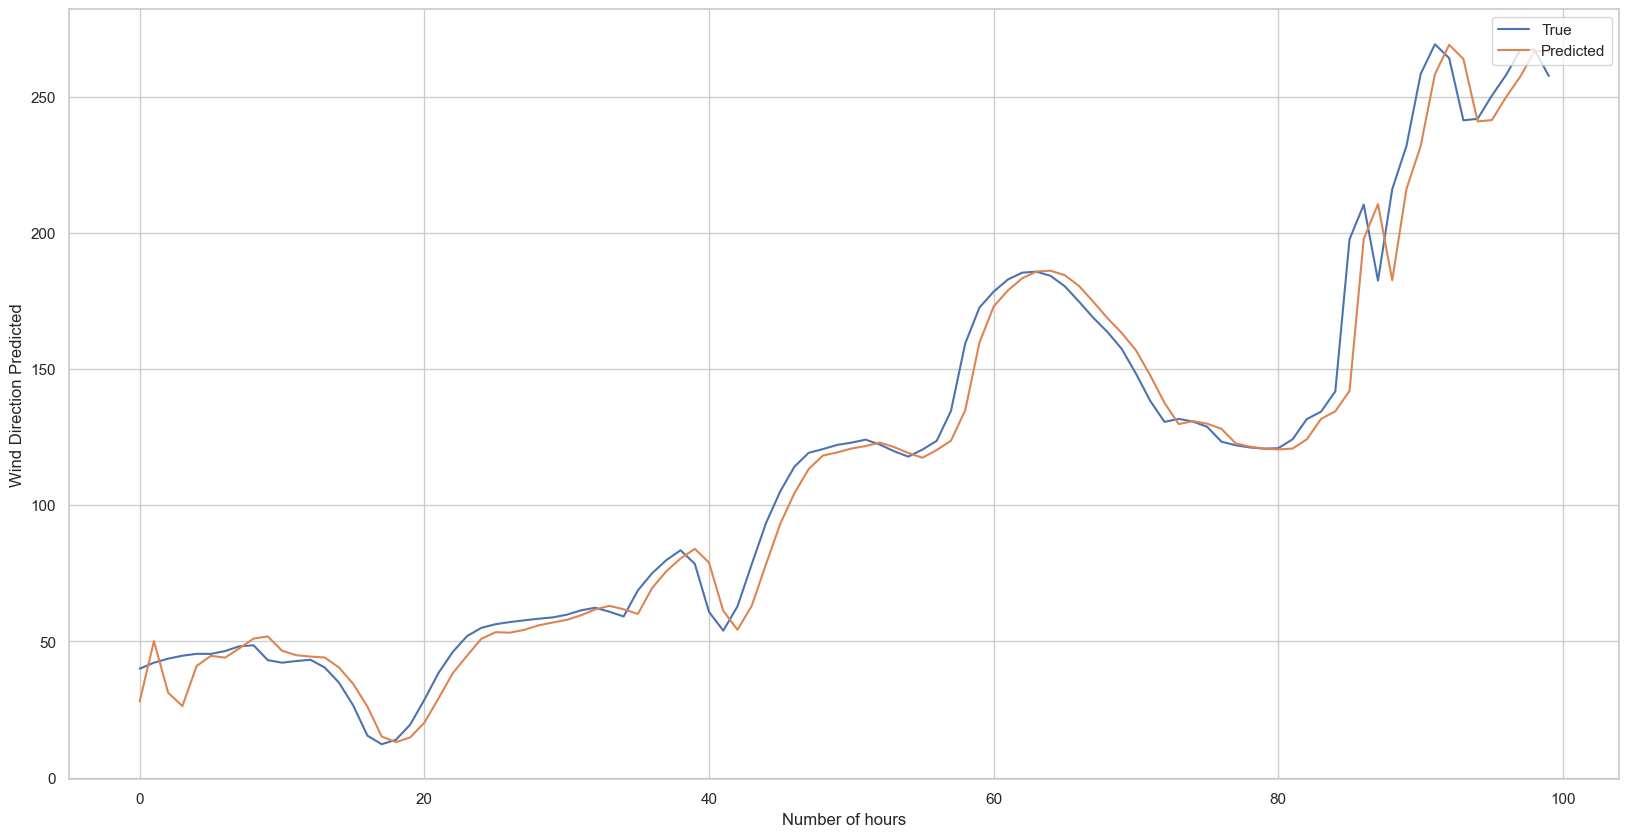

In [175]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Wind Direction Predicted")
pyplot.show()